## EDA, FE and Regression Model (Car Dekho Dataset)

### 1. EDA and FE
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
4. Data Cleaning
5. Data Scaling

### 2. Linear Regression Model
1. Linear Regression Model
2. Performance metrics for above model

### 3. Ridge, Lasso and Elastic-Net Regression Model
1. Ridge, Lasso and Elastic-Net Regression Model
2. Performance metrics for above model

### 4. Decision Tree Regressor Model
1. Decision Tree Regressor Model
2. Performance metrics for above model
3. Hyper-Parameter Tuning for above model

### 5. Support Vector Regressor Model
1. Support Vector Regressor Model
2. Performance metrics for above model
3. Hyper-Parameter Tuning for above model

### 6. Random Forest Regressor Model
1. Random Forest Regressor Model
2. Performance metrics for above model
3. Hyper-Parameter Tuning for above model

#### Dataset :
(link)[]

### 1) Importing Neccessary Libraries

In [100]:
!pip install category_encoders

     ---------------------------------------- 72.4/72.4 kB 2.0 MB/s eta 0:00:00


In [101]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 

### 2) Importing Dataset and Performing Descriptive Analysis

In [2]:
dataset = pd.read_csv("cardekho_dataset.csv")
dataset.head()

Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

### Feature Information
1. **car_name:**  Car's Full name, which includes brand and specific model name.
2. **brand:** Brand Name of the particular car.
3. **model:** Exact model name of the car of a particular brand.
4. **seller_type:** Which Type of seller is selling the used car
5. **fuel_type:** Fuel used in the used car, which was put up on sale.
6. **transmission_type:** Transmission used in the used car, which was put on sale.
7. **vehicle_age:** The count of years since car was bought.
8. **mileage:** It is the number of kilometer the car runs per litre.
9. **engine:** It is the engine capacity in cc(cubic centimeters)
10. **max_power:** Max power it produces in BHP.
11. **seats:** Total number of seats in car.
12. **selling_price:** The sale price which was put up on website.

In [3]:
# Dropping unneccessary columns
dataset.drop("Unnamed: 0", axis= 1, inplace=True)

In [4]:
# getting null values and datatypes of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [5]:
### getting info about features
dataset.describe(include='all').T

count unique          top   freq          mean  \
car_name             15411    121  Hyundai i20    906           NaN   
brand                15411     32       Maruti   4992           NaN   
model                15411    120          i20    906           NaN   
vehicle_age        15411.0    NaN          NaN    NaN      6.036338   
km_driven          15411.0    NaN          NaN    NaN  55616.480631   
seller_type          15411      3       Dealer   9539           NaN   
fuel_type            15411      5       Petrol   7643           NaN   
transmission_type    15411      2       Manual  12225           NaN   
mileage            15411.0    NaN          NaN    NaN     19.701151   
engine             15411.0    NaN          NaN    NaN   1486.057751   
max_power          15411.0    NaN          NaN    NaN    100.588254   
seats              15411.0    NaN          NaN    NaN      5.325482   
selling_price      15411.0    NaN          NaN    NaN  774971.11641   

                             std      min       25%       50%       75%  \
car_name                     NaN      NaN       NaN       NaN       NaN   
brand                        NaN      NaN       NaN       NaN       NaN   
model                        NaN      NaN       NaN       NaN       NaN   
vehicle_age             3.013291      0.0       4.0       6.0       8.0   
km_driven           51618.548422    100.0   30000.0   50000.0   70000.0   
seller_type                  NaN      NaN       NaN       NaN       NaN   
fuel_type                    NaN      NaN       NaN       NaN       NaN   
transmission_type            NaN      NaN       NaN       NaN       NaN   
mileage                 4.171265      4.0      17.0     19.67      22.7   
engine                521.106696    793.0    1197.0    1248.0    1582.0   
max_power              42.972979     38.4      74.0      88.5     117.3   
seats                   0.807628      0.0       5.0       5.0       5.0   
selling_price      894128.363263  40000.0  385000.0  556000.0  825000.0   

                          max  
car_name                  NaN  
brand                     NaN  
model                     NaN  
vehicle_age              29.0  
km_driven           3800000.0  
seller_type               NaN  
fuel_type                 NaN  
transmission_type         NaN  
mileage                 33.54  
engine                 6592.0  
max_power               626.0  
seats                     9.0  
selling_price      39500000.0

In [6]:
### checking duplicate values
dataset.duplicated().sum()

167

In [7]:
### dropping duplicate values
dataset.drop_duplicates(inplace=True)

In [8]:

### checking duplicate values after dropping duplicates
dataset.duplicated().sum()

0

### 3.0 Getting Categorical and Numerical features

In [9]:
### getting count of features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
print("There are {} categorical features namely: {}\n".format(len(categorical_features),categorical_features))

numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print("There are {} numerical features namely: {}".format(len(numerical_features),numerical_features))

There are 6 categorical features namely: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

There are 7 numerical features namely: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [10]:
### Getting count of categories in each features
for feature in categorical_features:
    print("The {} feature has '{}' no. of different categories".format(feature, dataset[feature].nunique()))

The car_name feature has '121' no. of different categories
The brand feature has '32' no. of different categories
The model feature has '120' no. of different categories
The seller_type feature has '3' no. of different categories
The fuel_type feature has '5' no. of different categories
The transmission_type feature has '2' no. of different categories


In [11]:
### top 10 categories in each feature percent wise
for feature in categorical_features:
    print(dataset[feature].value_counts(normalize=True)[:10]*100)
    print("-------------------------------------------")

Hyundai i20           5.890842
Maruti Swift Dzire    5.739963
Maruti Swift          5.077408
Maruti Alto           5.038048
Honda City            4.919969
Maruti Wagon R        4.651010
Hyundai Grand         3.732616
Toyota Innova         3.568617
Hyundai Verna         3.201260
Hyundai i10           2.663343
Name: car_name, dtype: float64
-------------------------------------------
Maruti        32.360273
Hyundai       19.364996
Honda          9.682498
Mahindra       6.553398
Toyota         5.175807
Ford           5.090527
Volkswagen     4.027814
Renault        3.457098
BMW            2.860142
Tata           2.761742
Name: brand, dtype: float64
-------------------------------------------
i20            5.890842
Swift Dzire    5.739963
Swift          5.077408
Alto           5.038048
City           4.919969
Wagon R        4.651010
Grand          3.732616
Innova         3.568617
Verna          3.201260
i10            2.663343
Name: model, dtype: float64
-----------------------------------

### 3.1 Brands and Cars wrt Sales

In [12]:
### Brands wrt car count
pd.DataFrame(dataset.groupby('brand')['brand'].count().sort_values(ascending=False)).rename(columns={'brand':'Car Count'})

Car Count
brand                   
Maruti              4933
Hyundai             2952
Honda               1476
Mahindra             999
Toyota               789
Ford                 776
Volkswagen           614
Renault              527
BMW                  436
Tata                 421
Skoda                333
Mercedes-Benz        332
Audi                 190
Datsun               170
Jaguar                58
Land Rover            50
Jeep                  41
Kia                   32
Porsche               21
Volvo                 20
MG                    19
Mini                  17
Nissan                11
Lexus                  9
Isuzu                  7
Bentley                3
Maserati               2
ISUZU                  2
Mercedes-AMG           1
Rolls-Royce            1
Force                  1
Ferrari                1

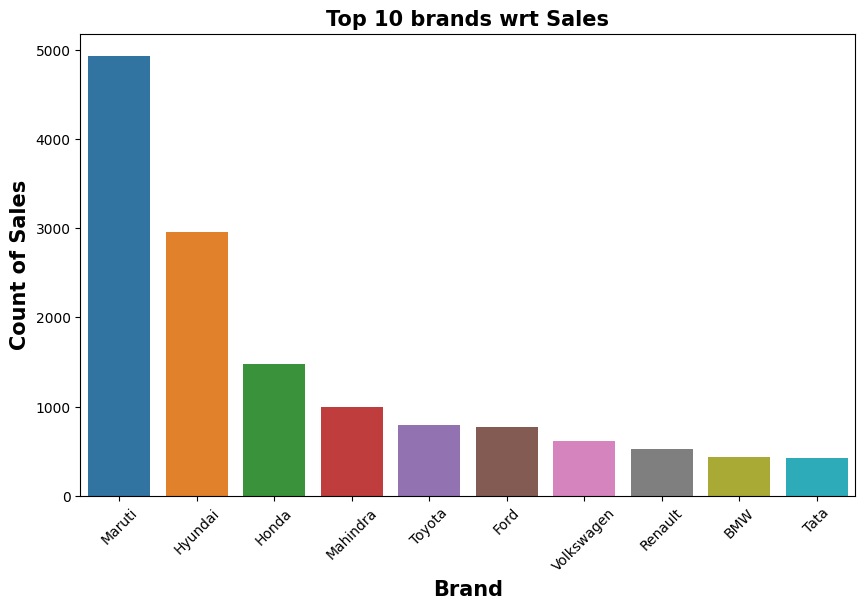

In [13]:
### Top 10 brands wrt sales
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['brand'].value_counts()[:10], x=dataset['brand'].value_counts().index[:10])
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Sales",fontsize=15, fontweight='bold')
plt.show();

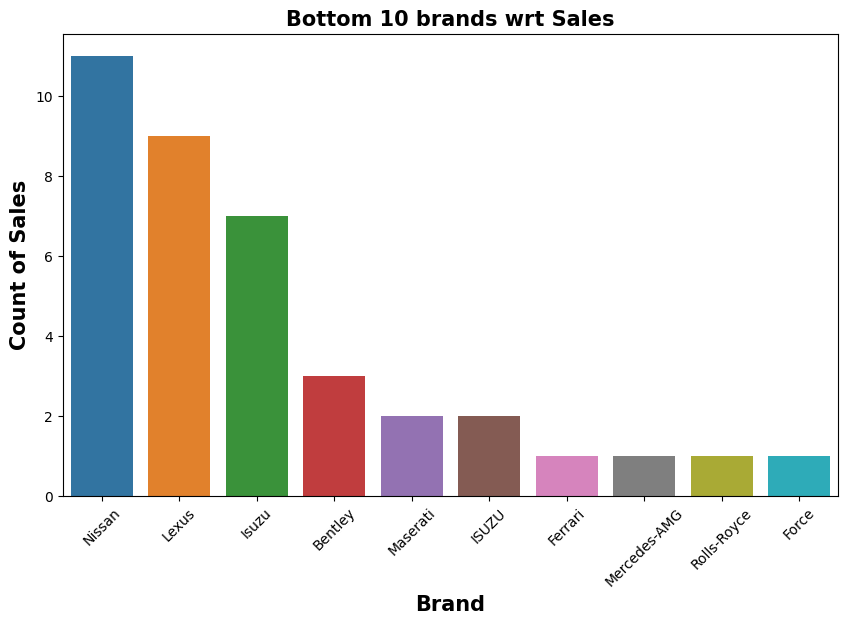

In [14]:
### Bottom 10 brands wrt sales
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['brand'].value_counts()[-10:], x=dataset['brand'].value_counts().index[-10:])
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Sales",fontsize=15, fontweight='bold')
plt.show();

In [15]:
### Top 10 Cars
pd.DataFrame(dataset.groupby('car_name')['car_name'].count().sort_values(ascending=False)[:10]).rename(columns={'car_name':'Car Count'})

Car Count
car_name                     
Hyundai i20               898
Maruti Swift Dzire        875
Maruti Swift              774
Maruti Alto               768
Honda City                750
Maruti Wagon R            709
Hyundai Grand             569
Toyota Innova             544
Hyundai Verna             488
Hyundai i10               406

In [16]:
### Bottom 10 Cars
pd.DataFrame(dataset.groupby('car_name')['car_name'].count().sort_values(ascending=False)[-10:]).rename(columns={'car_name':'Car Count'})

Car Count
car_name                        
ISUZU MUX                      2
Isuzu MUX                      1
Hyundai Aura                   1
Mercedes-AMG C                 1
Maserati Quattroporte          1
Maserati Ghibli                1
Rolls-Royce Ghost              1
Ferrari GTC4Lusso              1
Force Gurkha                   1
Tata Altroz                    1

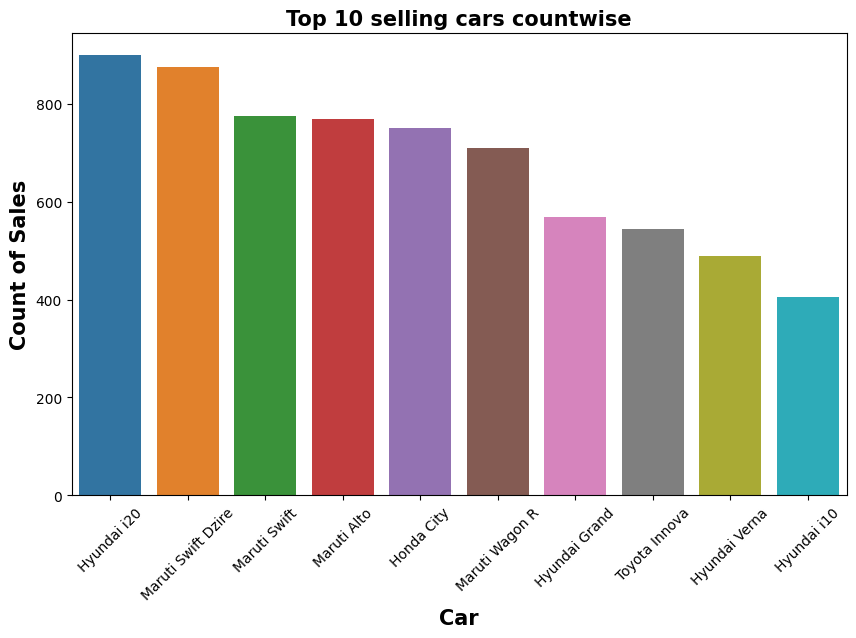

In [17]:
### Top 10 selling cars countwise
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['car_name'].value_counts()[:10], x=dataset['car_name'].value_counts().index[:10])
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 selling cars countwise",fontsize=15, fontweight='bold')
plt.show();

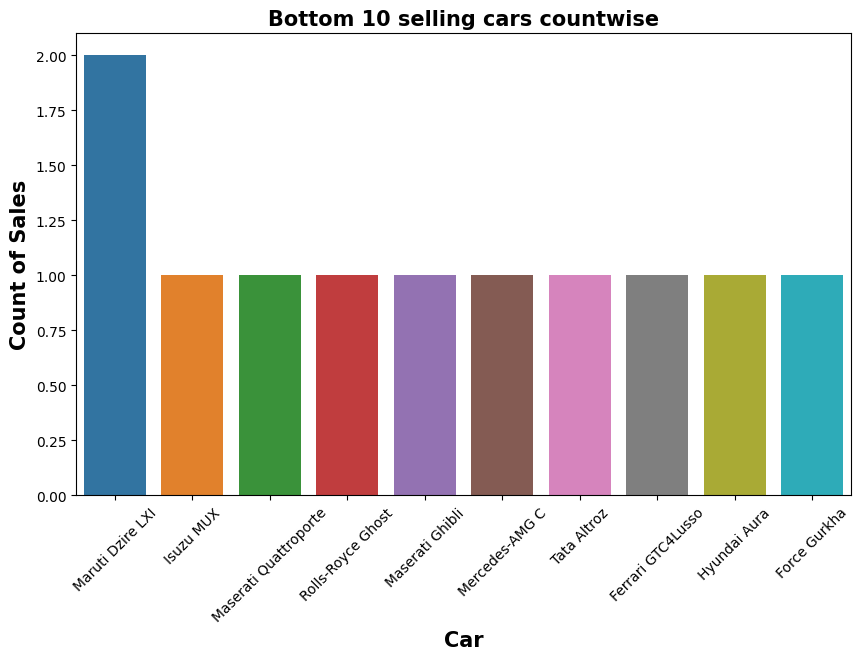

In [18]:
### Bottom 10 selling cars countwise
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['car_name'].value_counts()[-10:], x=dataset['car_name'].value_counts().index[-10:])
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 selling cars countwise",fontsize=15, fontweight='bold')
plt.show();

#### Observation
+ Maruti has most no of sales followed by hyundai and honda.
+ Whereas force, Rolls-royce, ferrari and Mercedes_AMG have least no. of sales.
+ Hyundai i20 is highest selling car followed by Swift dezire and swift.
+ Whereas force Gurkha, Hyundai aura, ferrari GTC4Lusso ,etc are least selling cars.

### 3.2 Brands and Cars wrt Total Selling Price

In [19]:
### Brands wrt Total Selling Price
pd.DataFrame(dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False)).rename(columns={'selling_price':'Total Selling Price'})

Total Selling Price
brand                             
Maruti                  2402298875
Hyundai                 1701766000
BMW                     1171390000
Toyota                  1082111000
Honda                    911360000
Mercedes-Benz            823437000
Mahindra                 787825000
Ford                     491764000
Audi                     374443000
Volkswagen               316529000
Tata                     288200000
Skoda                    261486000
Renault                  233213000
Land Rover               192344000
Jaguar                   153539000
Porsche                  108385000
Volvo                     74594000
Jeep                      73628000
Kia                       55528000
Datsun                    54488000
Lexus                     47365000
Ferrari                   39500000
Mini                      37105000
MG                        33306000
Bentley                   27800000
Rolls-Royce               24200000
Maserati                  12200000
Nissan                    10509000
Isuzu                      9640000
Mercedes-AMG               5100000
ISUZU                      3795000
Force                       700000

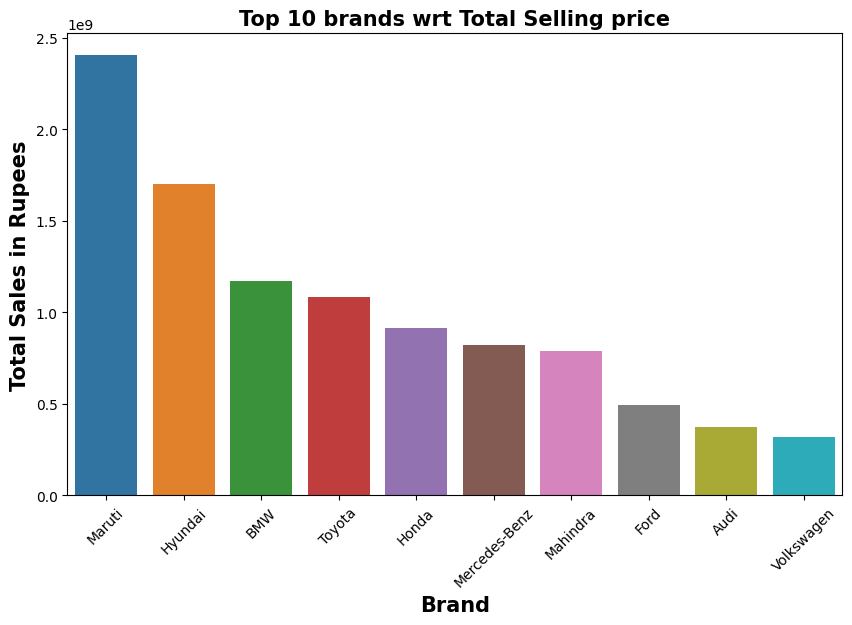

In [20]:
### Top 10 brands
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False).index[:10])
plt.ylabel('Total Sales in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Total Selling price",fontsize=15, fontweight='bold')
plt.show();

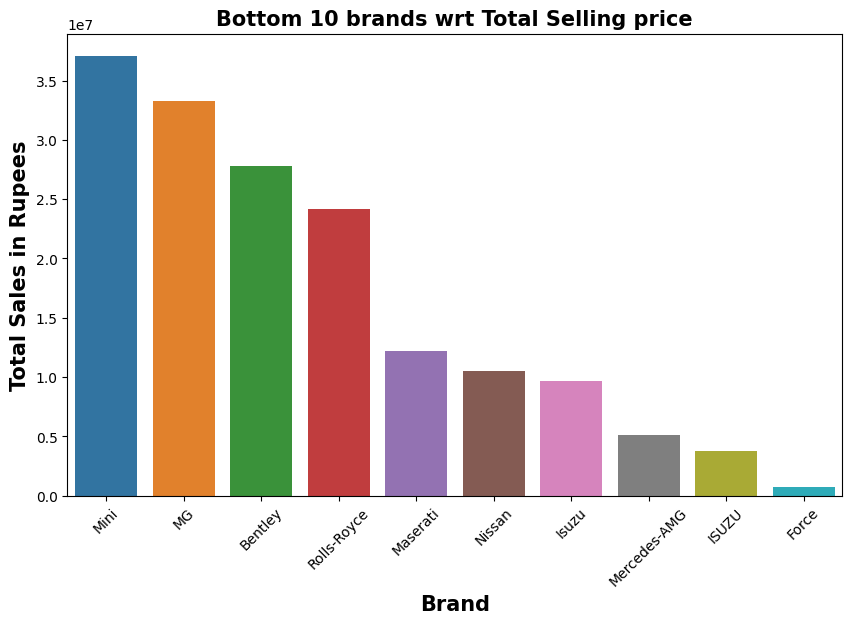

In [21]:
### Bottom 10 brands
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False).index[-10:])
plt.ylabel('Total Sales in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Total Selling price",fontsize=15, fontweight='bold')
plt.show();

In [22]:
### Top 10 Cars wrt Total Selling Price
pd.DataFrame(dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[:10]).rename(columns={'selling_price':'Total Selling Price'})

Total Selling Price
car_name                               
Toyota Innova                 639831000
Hyundai i20                   487790000
Honda City                    468565000
Maruti Swift Dzire            459811000
Maruti Swift                  365551000
Toyota Fortuner               364188000
Hyundai Creta                 343551000
BMW 5                         337804000
Mahindra XUV500               329429000
Hyundai Verna                 318210000

In [23]:
### Bottom 10 Cars wrt Total Selling Price
pd.DataFrame(dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[-10:]).rename(columns={'selling_price':'Toatl Selling Price'})

Toatl Selling Price
car_name                             
Honda CR                      4415000
ISUZU MUX                     3795000
Datsun redi-GO                3212000
Isuzu MUX                     2300000
Maruti Dzire ZXI              2200000
Nissan X-Trail                2135000
Hyundai Aura                   900000
Maruti Dzire LXI               885000
Tata Altroz                    730000
Force Gurkha                   700000

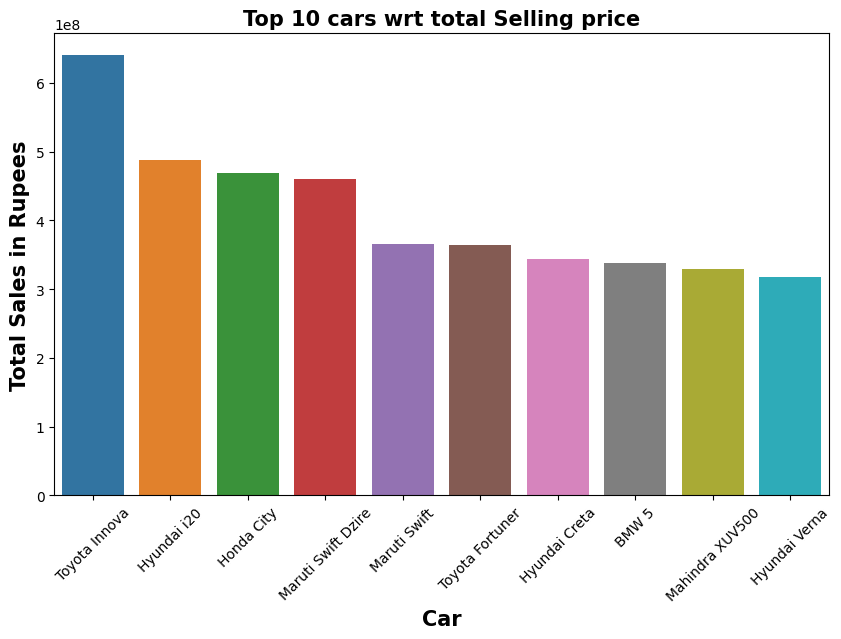

In [24]:
### Top 10 selling cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False).index[:10])
plt.ylabel('Total Sales in Rupees',fontsize=15,  fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 cars wrt total Selling price",fontsize=15, fontweight='bold')
plt.show();

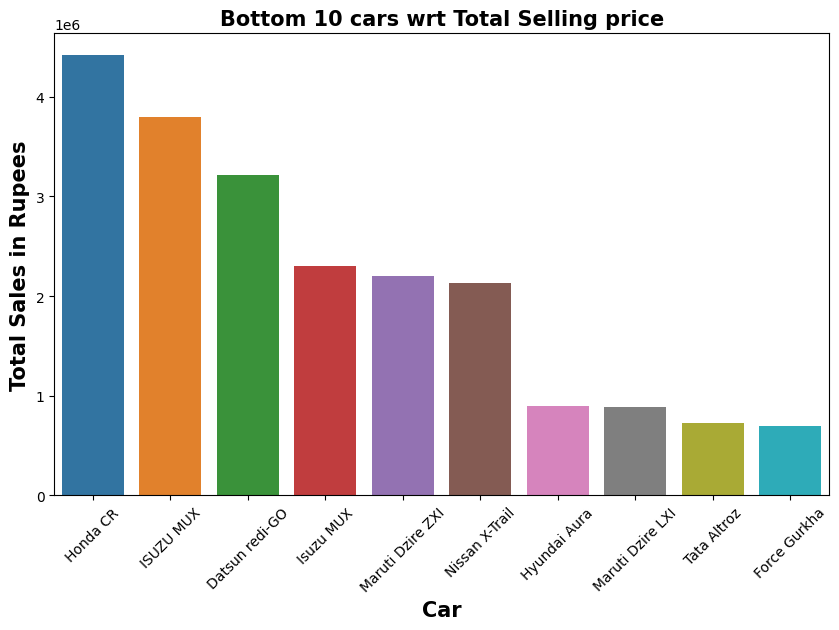

In [25]:
### Bottom 10 selling cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False).index[-10:])
plt.ylabel('Total Sales in Rupees',fontsize=15,  fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 cars wrt Total Selling price",fontsize=15, fontweight='bold')
plt.show();

### Observation
+ Maruti has highest Total amount of sales followed by hyundai and BMW.
+ Whereas force, ISUZU, Mercedes_AMG and Nissan have least Total amount of sales in that order.
+ Toyota Innova has highest total amount of sales followed by Hyundai i20 and Honda City.
+ Whereas force Gurkha, Tata Altroz, Maruti dzire LXI have least total amount of car sales.

### 3.3 Brands and Cars wrt Costliest Cars

In [26]:
### Brands wrt Costliest Car
pd.DataFrame(dataset.groupby('brand')['selling_price'].max().sort_values(ascending=False)).rename(columns={'selling_price':'Costliest Car Price'})

Costliest Car Price
brand                             
Ferrari                   39500000
Rolls-Royce               24200000
Bentley                   14500000
Mercedes-Benz             13000000
Porsche                   11100000
Land Rover                 9200000
BMW                        8500000
Volvo                      8195000
Lexus                      8000000
Audi                       6800000
Jaguar                     6300000
Maserati                   6200000
Jeep                       5600000
Mercedes-AMG               5100000
Mini                       3875000
Toyota                     3650000
Skoda                      3550000
Kia                        3525000
Ford                       3200000
Honda                      3200000
Mahindra                   2950000
Hyundai                    2600000
Isuzu                      2300000
MG                         2075000
ISUZU                      1900000
Tata                       1750000
Nissan                     1450000
Volkswagen                 1250000
Maruti                     1225000
Renault                    1155000
Force                       700000
Datsun                      650000

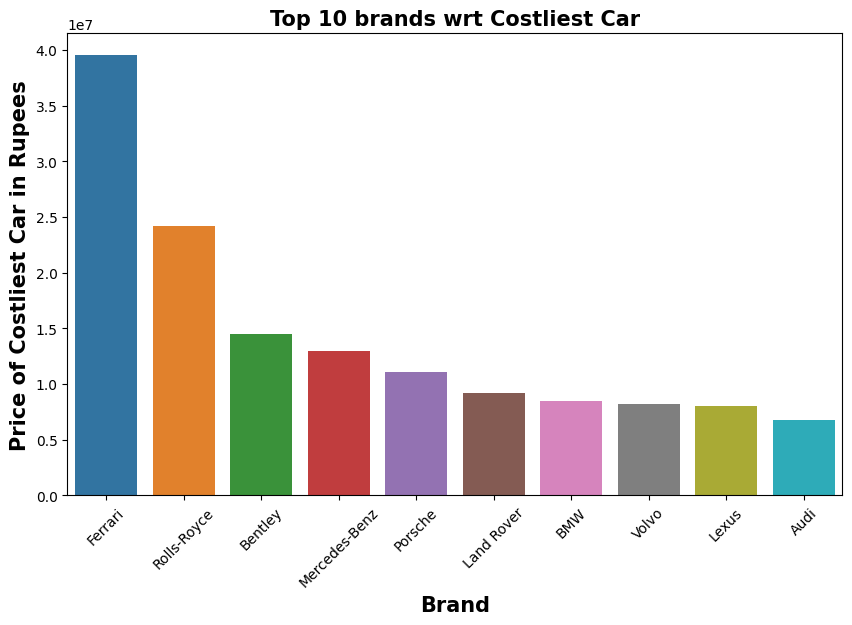

In [27]:
### Top 10 brand wrt Costliest car
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').selling_price.max().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand').selling_price.max().sort_values(ascending=False).index[:10])
plt.ylabel('Price of Costliest Car in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Costliest Car",fontsize=15, fontweight='bold')
plt.show();

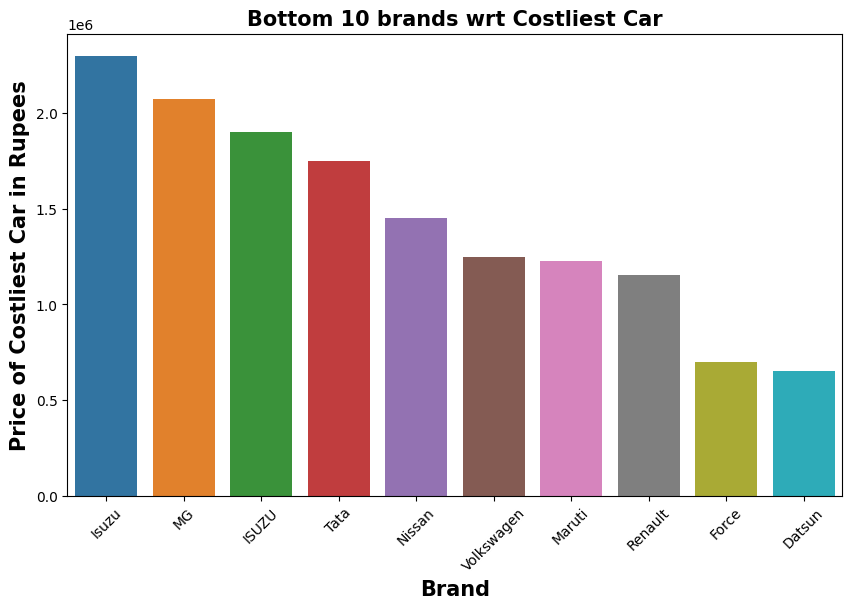

In [28]:
### Bottom 10 brand wrt Costliest cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').selling_price.max().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand').selling_price.max().sort_values(ascending=False).index[-10:])
plt.ylabel('Price of Costliest Car in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Costliest Car",fontsize=15, fontweight='bold')
plt.show();

In [29]:
### Top 10 Costliest Car
pd.DataFrame(dataset.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[:10]).rename(columns={'selling_price':'Car Price'})

Car Price
car_name                        
Ferrari GTC4Lusso       39500000
Rolls-Royce Ghost       24200000
Bentley Continental     14500000
Mercedes-Benz S-Class   13000000
Porsche Cayenne         11100000
Land Rover Rover         9200000
BMW 7                    8500000
BMW Z4                   8250000
Volvo XC                 8195000
BMW X5                   8100000

In [30]:
### Bottom 10 Costliest Car
pd.DataFrame(dataset.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[-10:]).rename(columns={'selling_price':'Car Price'})

Car Price
car_name                   
Maruti Wagon R       625000
Maruti Celerio       595000
Maruti S-Presso      550000
Renault KWID         550000
Maruti Dzire LXI     500000
Hyundai i10          500000
Maruti Eeco          490000
Maruti Alto          485000
Datsun redi-GO       435000
Datsun RediGO        425000

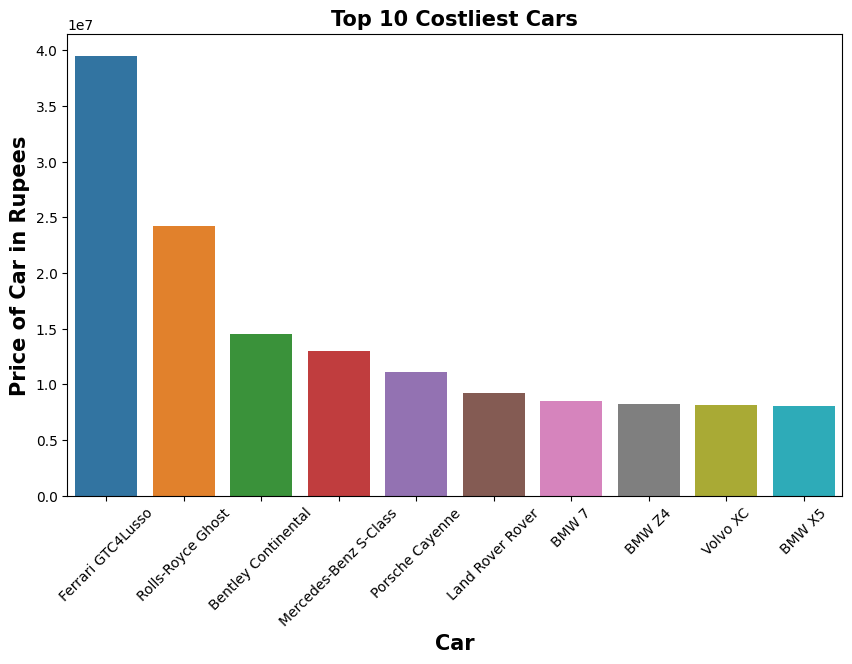

In [31]:
### Top 10 costliest cars
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').selling_price.max().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name').selling_price.max().sort_values(ascending=False).index[:10:])
plt.ylabel('Price of Car in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Costliest Cars",fontsize=15, fontweight='bold')
plt.show();

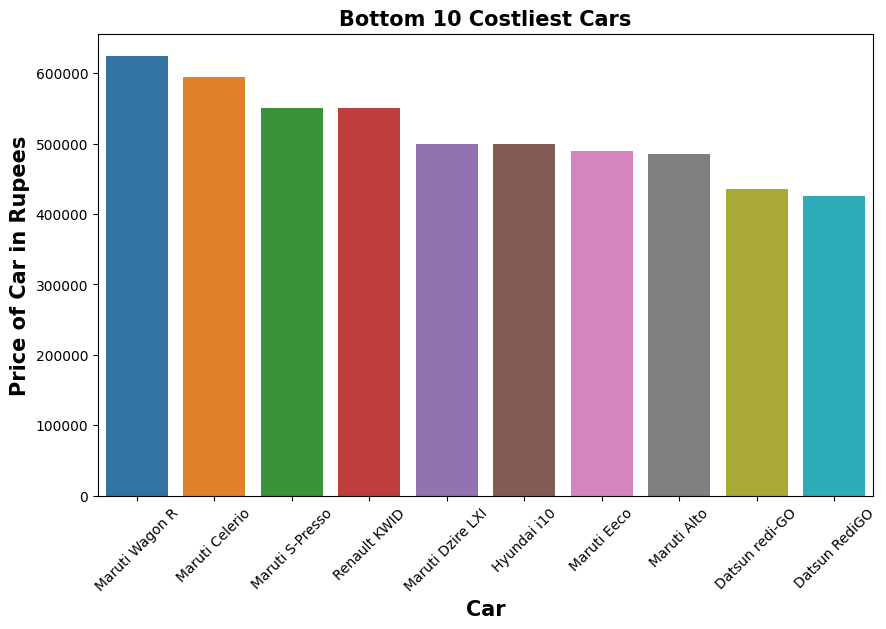

In [32]:
### Bottom 10 costliest cars
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').selling_price.max().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name').selling_price.max().sort_values(ascending=False).index[-10:])
plt.ylabel('Price of Car in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Costliest Cars",fontsize=15, fontweight='bold')
plt.show();

### Observation
+ Ferrari has Costliest car followed by Rolls-Royce and Bentley.
+ Datsun has cheapest car followed by Force and Renault.
+ Ferrari GTC4Lusso is costliest car followed by Rolls-Royce Ghost and bentley Continental.
+ Datsun RediGO is cheapest car followed by Maruti Alto and Maruti Eeco

### 3.4 Brands and Cars wrt Mileage

In [33]:
### Brand wrt Average Mileage
pd.DataFrame(dataset.groupby('brand')['mileage'].mean().sort_values(ascending=False)).rename(columns={'mileage':'Average mileage'})

Average mileage
brand                         
Maruti               22.425520
Renault              22.073586
Datsun               21.215647
Lexus                20.676667
Ford                 19.970335
Honda                19.901463
Maserati             19.820000
Tata                 19.780855
Hyundai              19.590650
Volkswagen           18.690977
Mini                 18.287647
Skoda                17.663904
BMW                  17.450046
Kia                  17.323125
Force                17.000000
Jeep                 16.236585
Nissan               16.151818
Audi                 16.119737
Jaguar               16.085172
Mahindra             15.864314
MG                   15.620526
Volvo                14.860000
ISUZU                13.800000
Mercedes-Benz        13.531054
Porsche              13.515714
Toyota               13.207414
Land Rover           13.038400
Isuzu                12.600000
Mercedes-AMG         11.900000
Rolls-Royce          10.200000
Bentley               8.033333
Ferrari               4.000000

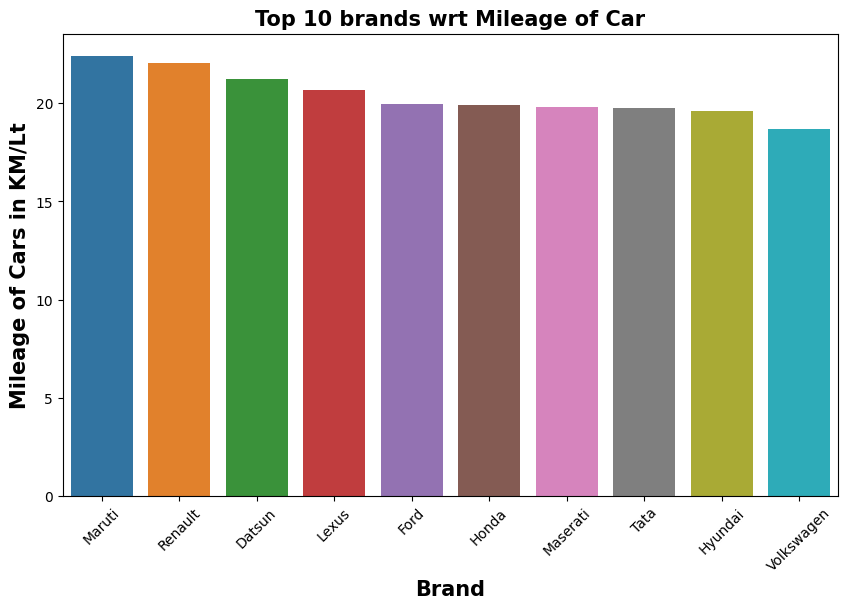

In [34]:
### Top 10 brand wrt Mileage of cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').mileage.mean().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand').mileage.mean().sort_values(ascending=False).index[:10])
plt.ylabel('Mileage of Cars in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Mileage of Car",fontsize=15, fontweight='bold')
plt.show();

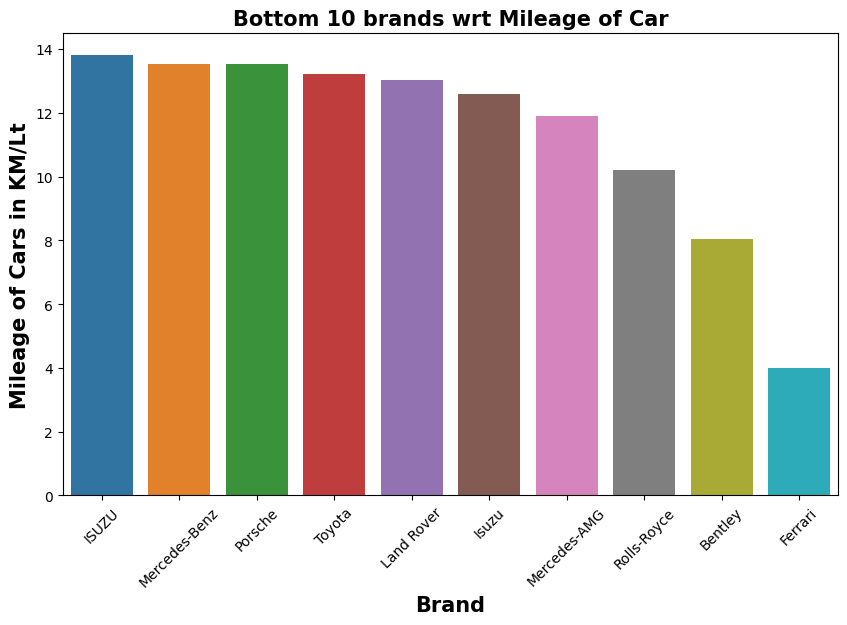

In [35]:
### Top 10 brand wrt Mileage of cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').mileage.mean().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand').mileage.mean().sort_values(ascending=False).index[-10:])
plt.ylabel('Mileage of Cars in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Mileage of Car",fontsize=15, fontweight='bold')
plt.show();

In [36]:
### Top 10 car wrt Mileage
pd.DataFrame(dataset.groupby('brand')['mileage'].mean().sort_values(ascending=False)[:10]).rename(columns={'mileage':'Average mileage'})

Average mileage
brand                      
Maruti            22.425520
Renault           22.073586
Datsun            21.215647
Lexus             20.676667
Ford              19.970335
Honda             19.901463
Maserati          19.820000
Tata              19.780855
Hyundai           19.590650
Volkswagen        18.690977

In [37]:
### Bottom 10 car wrt Mileage
pd.DataFrame(dataset.groupby('brand')['mileage'].mean().sort_values(ascending=False)[-10:]).rename(columns={'mileage':'Average mileage'})

Average mileage
brand                         
ISUZU                13.800000
Mercedes-Benz        13.531054
Porsche              13.515714
Toyota               13.207414
Land Rover           13.038400
Isuzu                12.600000
Mercedes-AMG         11.900000
Rolls-Royce          10.200000
Bentley               8.033333
Ferrari               4.000000

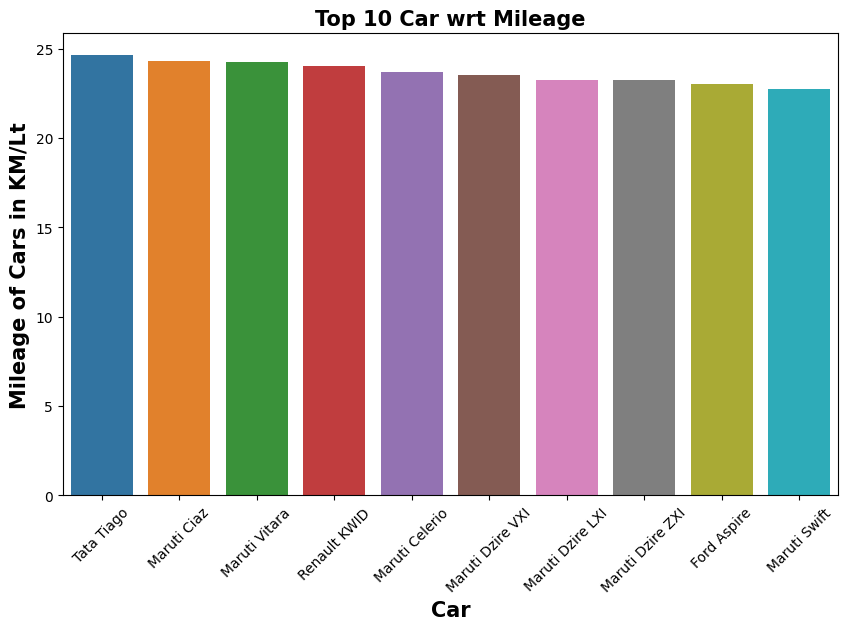

In [38]:
### Top 10 car wrt Mileage 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').mileage.mean().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name').mileage.mean().sort_values(ascending=False).index[:10])
plt.ylabel('Mileage of Cars in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Car wrt Mileage",fontsize=15, fontweight='bold')
plt.show();

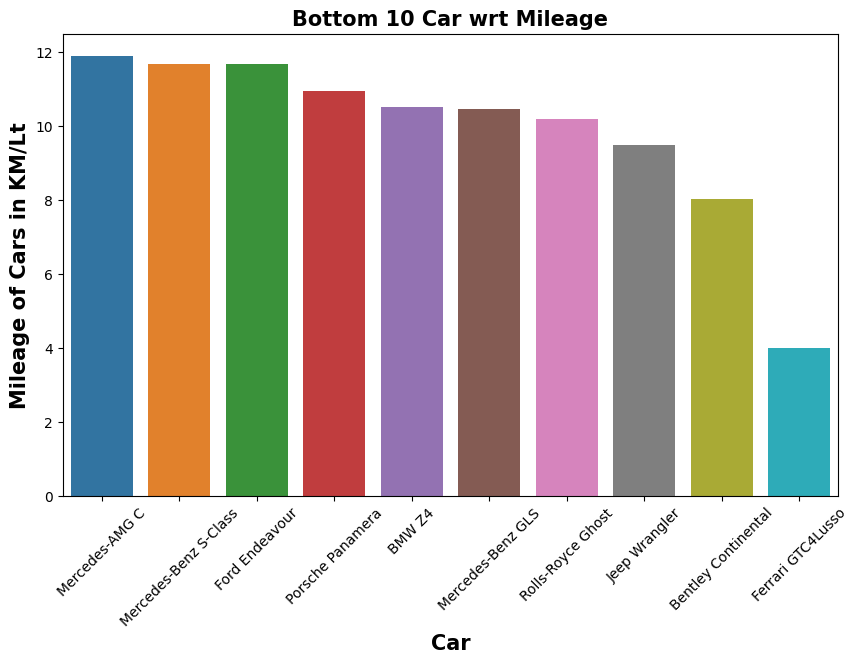

In [39]:
### bottom 10 car wrt Mileage 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').mileage.mean().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name').mileage.mean().sort_values(ascending=False).index[-10:])
plt.ylabel('Mileage of Cars in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Car wrt Mileage",fontsize=15, fontweight='bold')
plt.show();

### 3.5 Brands and Cars wrt Max Power

In [40]:
### Brands wrt Mean Max Power
pd.DataFrame(dataset.groupby('brand')['max_power'].mean().sort_values(ascending=False)).rename(columns={'max_power':'Mean Max Power'})

Mean Max Power
brand                        
Ferrari            601.000000
Bentley            592.666667
Rolls-Royce        563.000000
Mercedes-AMG       362.070000
Porsche            299.028571
Maserati           270.940000
Lexus              219.912222
Mercedes-Benz      210.780120
Land Rover         210.237400
BMW                207.604266
Jaguar             205.987414
Volvo              205.350000
Audi               181.430158
ISUZU              175.000000
Jeep               172.375610
Mini               151.167059
MG                 150.829474
Isuzu              139.795714
Toyota             135.806793
Kia                130.025000
Skoda              126.194414
Nissan             122.119091
Tata               109.823159
Mahindra           109.177568
Honda              104.340732
Ford                95.931198
Volkswagen          92.629837
Hyundai             92.459993
Force               80.800000
Renault             75.055579
Maruti              74.530935
Datsun              62.645294

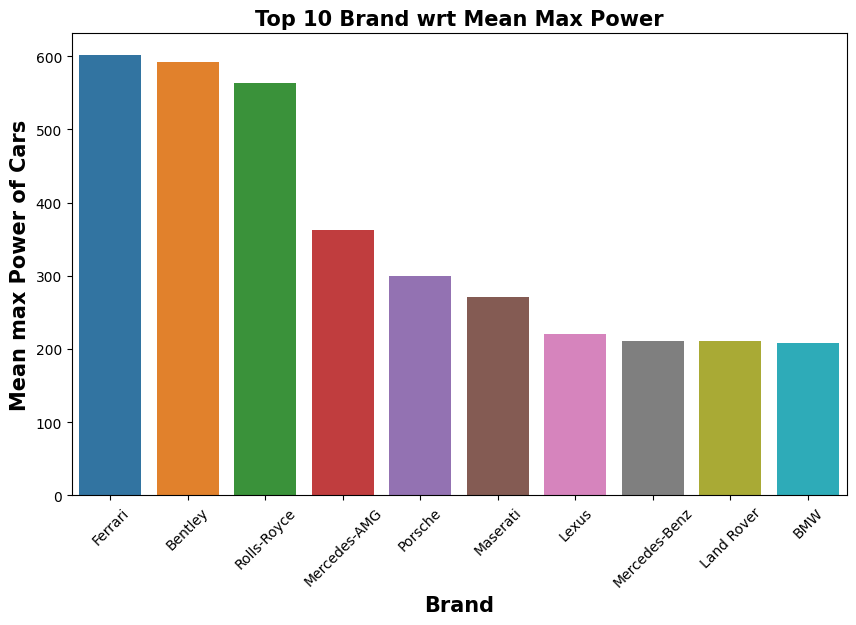

In [41]:
### Top 10 Brands wrt Mean Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').max_power.mean().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand').max_power.mean().sort_values(ascending=False).index[:10])
plt.ylabel('Mean max Power of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Brand wrt Mean Max Power",fontsize=15, fontweight='bold')
plt.show()

In [42]:
### Bottom 10 Brands wrt Mean Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').max_power.mean().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand').max_power.mean().sort_values(ascending=False).index[-10:])
plt.ylabel('Mean max Power of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Brand wrt Mean Max Power",fontsize=15, fontweight='bold')
plt.show();

In [43]:
### Top 10 Cars wrt Max Power
pd.DataFrame(dataset.groupby('car_name')['max_power'].max().sort_values(ascending=False)[:10]).rename(columns={'max_power':'Max Power'})

Max Power
car_name                         
Bentley Continental        626.00
Ferrari GTC4Lusso          601.00
Rolls-Royce Ghost          563.00
Porsche Cayenne            500.00
Mercedes-Benz S-Class      459.00
BMW 6                      450.00
BMW 7                      402.00
Porsche Panamera           394.30
Mercedes-AMG C             362.07
Mercedes-Benz GL-Class     362.00

In [44]:
### Top 10 Cars wrt Max Power
pd.DataFrame(dataset.groupby('car_name')['max_power'].max().sort_values(ascending=False)[-10:]).rename(columns={'max_power':'Max Power'})

Max Power
car_name                  
Datsun GO            76.43
Maruti Eeco          73.00
Renault Triber       72.00
Hyundai Santro       68.07
Datsun RediGO        68.00
Maruti Alto          67.10
Maruti Celerio       67.05
Datsun redi-GO       67.05
Renault KWID         67.00
Maruti S-Presso      67.00

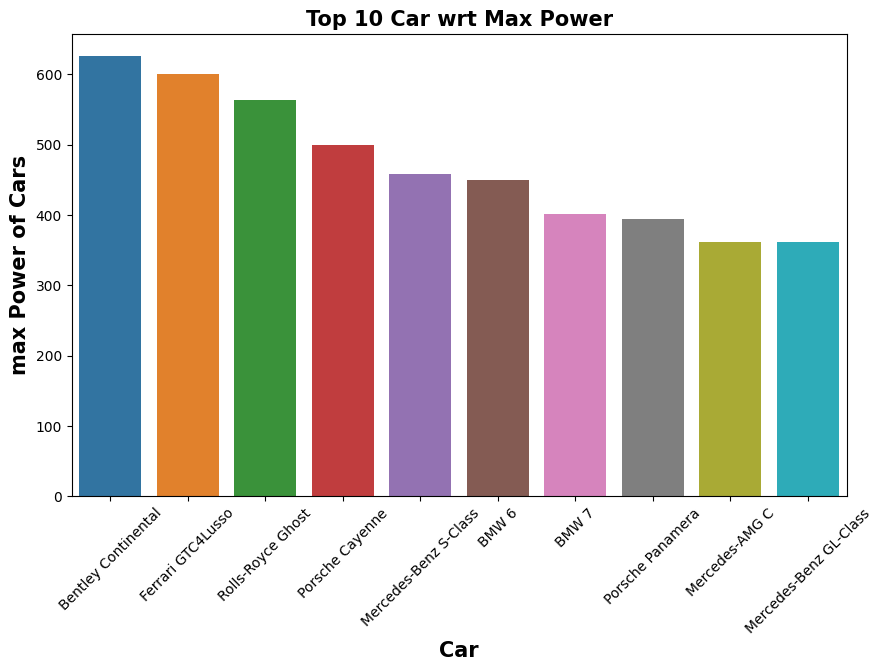

In [45]:
### Top 10 car wrt Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').max_power.max().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name').max_power.max().sort_values(ascending=False).index[:10])
plt.ylabel('max Power of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Car wrt Max Power",fontsize=15, fontweight='bold')
plt.show();

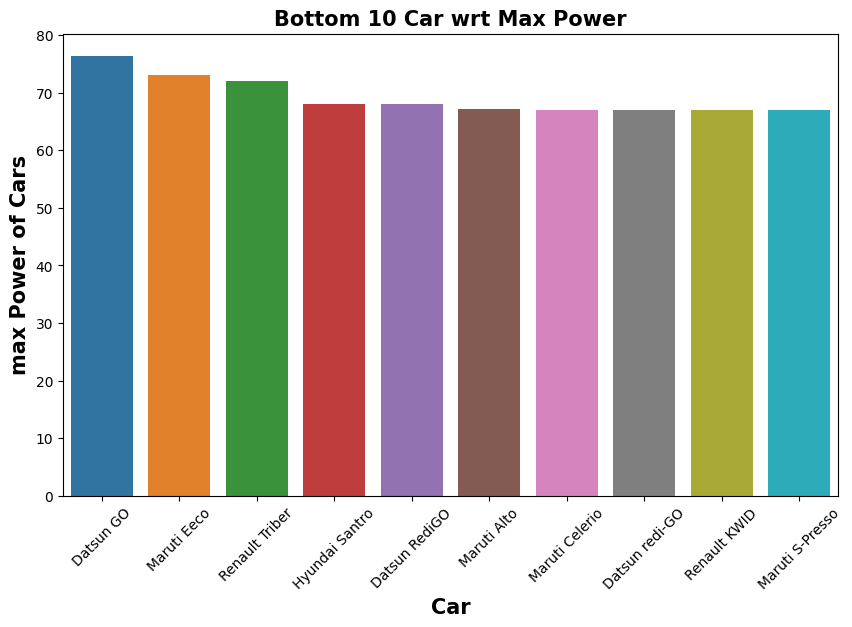

In [46]:
### Top 10 car wrt Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').max_power.max().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name').max_power.max().sort_values(ascending=False).index[-10:])
plt.ylabel('max Power of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Car wrt Max Power",fontsize=15, fontweight='bold')
plt.show();

### Observation
+ Ferrari has highest Mean Max Power followed by Bentley and Rolls-Royce.
+ Datsun has least Mean Max Power followed by Maruti and Renault.
+ Bentley Continental has highest Mean Max Power followed by Ferrari GTC4lusso and Rolls-Royce Ghost.
+ Maruti S-Presso least Mean Max Power followed by Renault KWID and Datsun RediGo.

### 3.6 Brands and Cars wrt Km Driven

In [47]:
### Brands wrt Mean KM Driven
pd.DataFrame(dataset.groupby('brand')['km_driven'].mean().sort_values(ascending=False)).rename(columns={'km_driven':'Mean KM Driven'})

Mean KM Driven
brand                        
Toyota           91840.925222
Mahindra         73075.585586
Isuzu            69876.000000
Land Rover       65874.760000
Skoda            64784.492492
Volkswagen       62849.574919
Volvo            61232.300000
Force            60000.000000
Mercedes-Benz    59471.605422
Audi             58600.231579
Porsche          58356.952381
Ford             58324.350515
ISUZU            56014.500000
Honda            53525.912602
Maruti           51386.572268
BMW              51094.483945
Hyundai          50346.743225
Renault          47803.174573
Tata             47466.076010
Jaguar           44499.103448
Nissan           37853.363636
Jeep             33401.365854
Datsun           33003.576471
Mini             32210.705882
Lexus            28210.444444
Bentley          25500.000000
Mercedes-AMG     24000.000000
Maserati         12250.000000
MG               11538.684211
Kia               9255.437500
Rolls-Royce       5000.000000
Ferrari           3800.000000

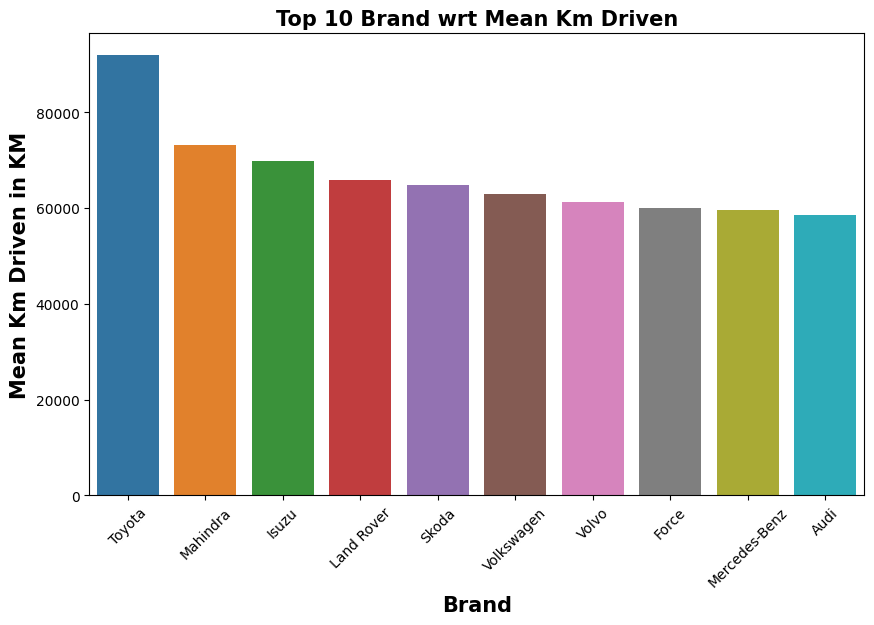

In [48]:
### Top 10 Brands wrt Mean Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').km_driven.mean().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand').km_driven.mean().sort_values(ascending=False).index[:10])
plt.ylabel('Mean Km Driven in KM',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Brand wrt Mean Km Driven",fontsize=15, fontweight='bold')
plt.show();

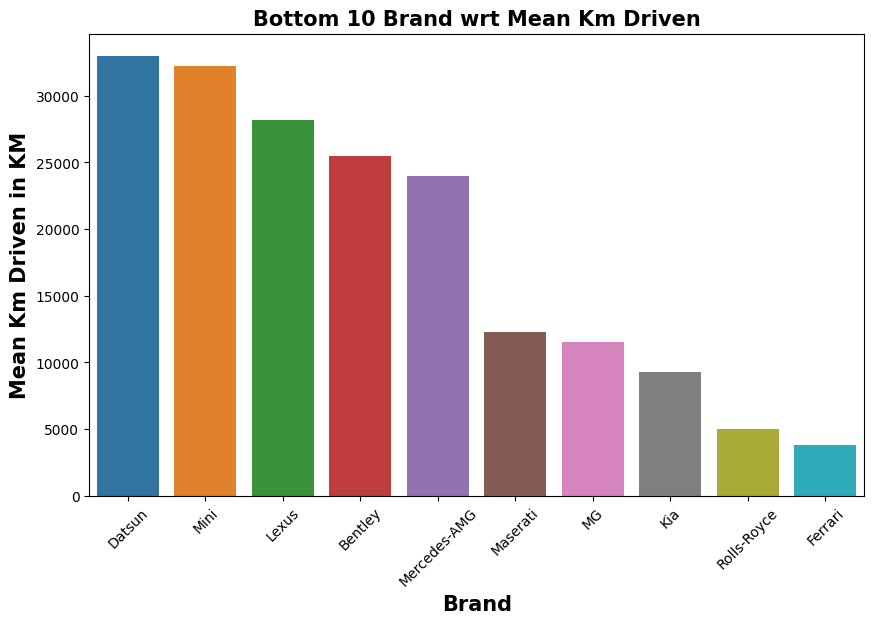

In [49]:
### Bottom 10 Brands wrt Mean Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').km_driven.mean().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand').km_driven.mean().sort_values(ascending=False).index[-10:])
plt.ylabel('Mean Km Driven in KM',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Brand wrt Mean Km Driven",fontsize=15, fontweight='bold')
plt.show();

In [50]:
### Top 10 car wrt Km Driven
pd.DataFrame(dataset.groupby('car_name')['km_driven'].max().sort_values(ascending=False)[10:]).rename(columns={'km_driven':'Max KM Driven'})

Max KM Driven
car_name                            
Ford Figo                     570000
Honda Jazz                    525000
Mahindra Bolero               500000
Maruti Ciaz                   480000
Maruti Vitara                 480000
...                              ...
Maserati Quattroporte           9500
Rolls-Royce Ghost               5000
Hyundai Aura                    4500
Tata Altroz                     3800
Ferrari GTC4Lusso               3800

[111 rows x 1 columns]

In [51]:
### Top 10 car wrt Km Driven
pd.DataFrame(dataset.groupby('car_name')['km_driven'].max().sort_values(ascending=False)[-10:]).rename(columns={'km_driven':'Max KM Driven'})

Max KM Driven
car_name                            
Maruti XL6                     23000
Maserati Ghibli                15000
Kia Carnival                   14000
BMW X4                         14000
Maruti S-Presso                12000
Maserati Quattroporte           9500
Rolls-Royce Ghost               5000
Hyundai Aura                    4500
Tata Altroz                     3800
Ferrari GTC4Lusso               3800

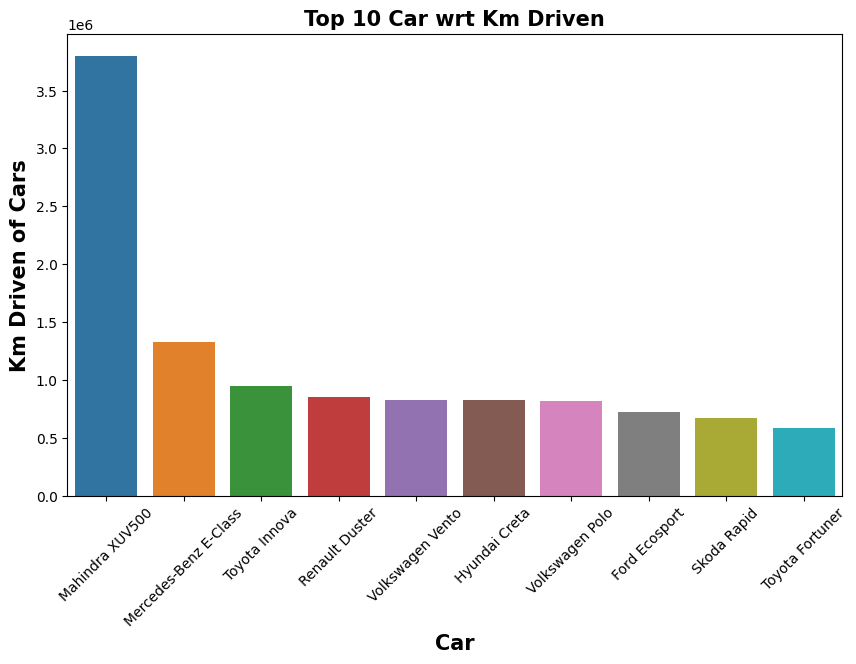

In [52]:
### Top 10 car wrt Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').km_driven.max().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name').km_driven.max().sort_values(ascending=False).index[:10])
plt.ylabel('Km Driven of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Car wrt Km Driven",fontsize=15, fontweight='bold')
plt.show();

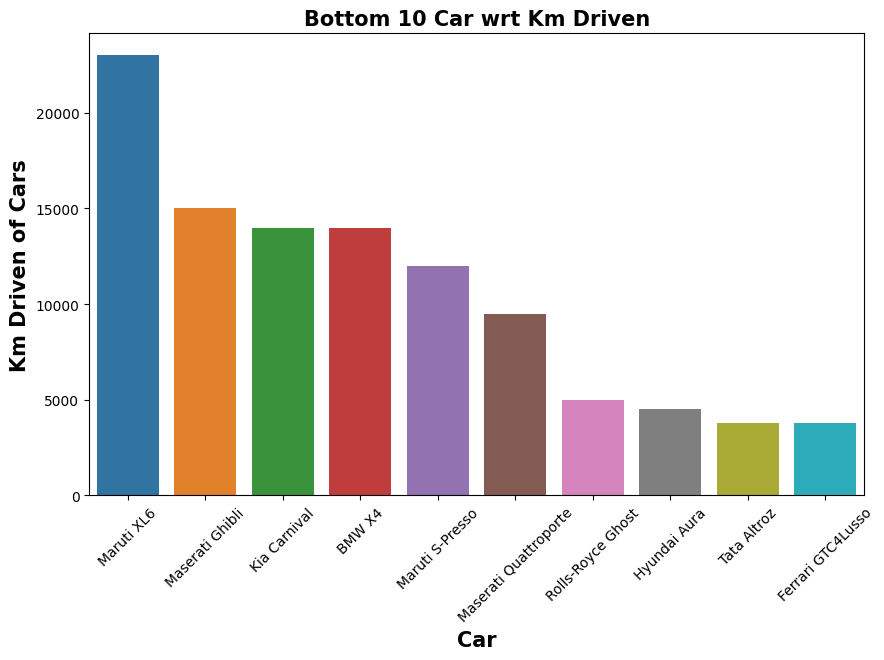

In [53]:
### Bottom 10 car wrt Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').km_driven.max().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name').km_driven.max().sort_values(ascending=False).index[-10:])
plt.ylabel('Km Driven of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Car wrt Km Driven",fontsize=15, fontweight='bold')
plt.show();

### Observation
+ Toyota cars have highest Mean KM Driven followed by Mahindra and isuzu.
+ Ferrari cars have least Mean KM Driven followed by Rolls-Royce and Kia.
+ Mahindra XUV500 has highest KM Driven followed by Mercedes-Benz E-class and Toyota Innova.
+ Ferrari GTC4lusso has least KM Driven followed by Tata Altroz and Hyundai Aura.

### 3.7 KM Driven and Seller Type vs Selling Price

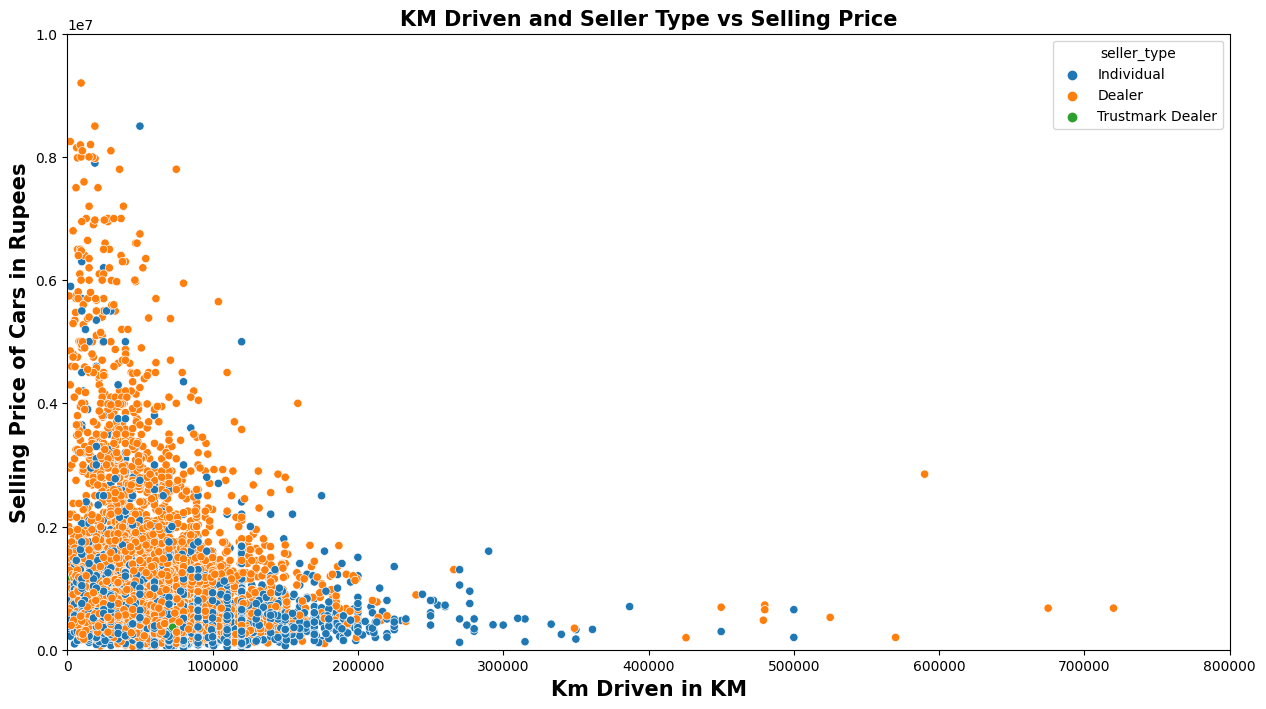

In [54]:
### Km driven wrt selling price
plt.figure(figsize=(15,8))
sns.scatterplot(y=dataset['selling_price'], x=dataset['km_driven'], hue=dataset['seller_type'])
plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Km Driven in KM",fontsize=15, fontweight='bold')
plt.xlim(0,800000) #limit is used for scaling the axis
plt.ylim(0,10000000)
plt.title("KM Driven and Seller Type vs Selling Price",fontsize=15, fontweight='bold')
plt.show();

### Observation
+ It is difficult to sell car if Km Driven is greater than 20K.
+ As the Km driven increases the the Selling price of cars Decreases.
+ It is easy to sell cars at higher price if it is sold by a dealer.

### 3.8 KM Driven and transmission_type vs Selling Price

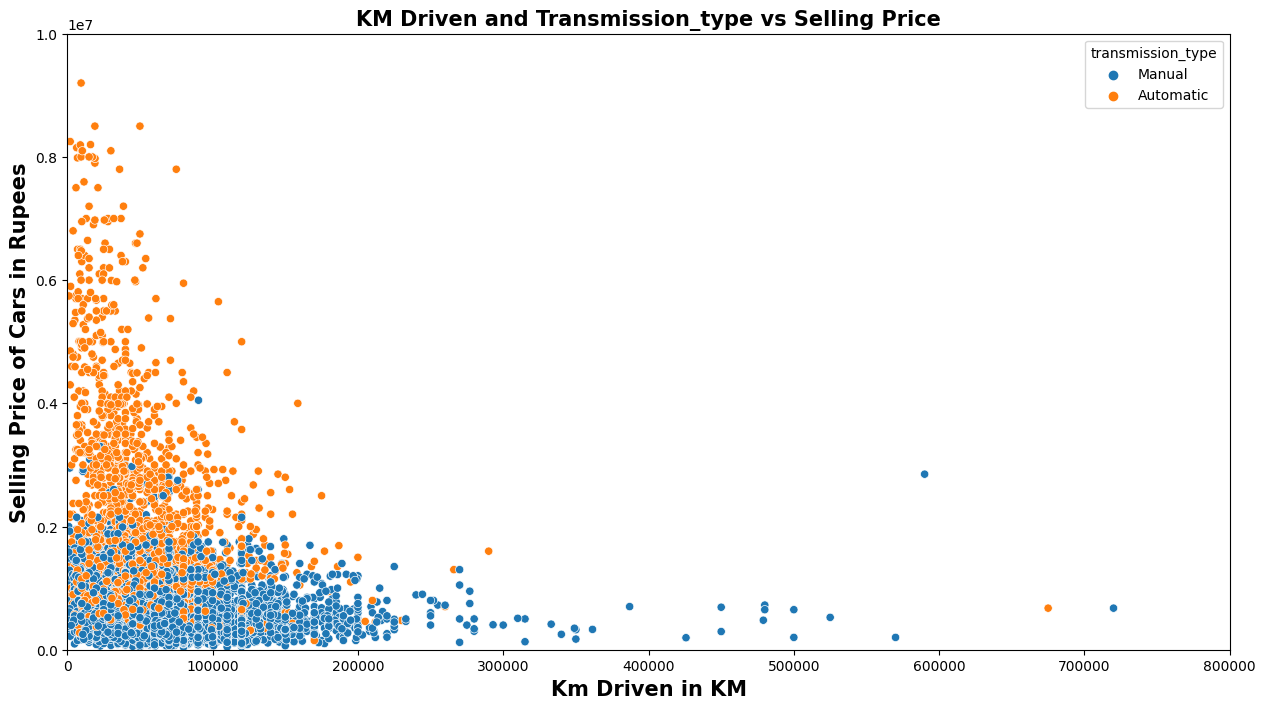

In [55]:
### Km driven wrt selling price
plt.figure(figsize=(15,8))
sns.scatterplot(y=dataset['selling_price'], x=dataset['km_driven'], hue=dataset['transmission_type'])
plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Km Driven in KM",fontsize=15, fontweight='bold')
plt.xlim(0,800000) #limit is used for scaling the axis
plt.ylim(0,10000000)
plt.title("KM Driven and Transmission_type vs Selling Price",fontsize=15, fontweight='bold')
plt.show();

### Observation
+ It is difficult to sell car if Km Driven is greater than 20K.
+ As the Km driven increases the the Selling price of cars Decreases.
+ Automatic Transmission cars sell at higher rate than manual Transmission cars.

### 3.9 KM Driven and fuel_type vs Selling Price

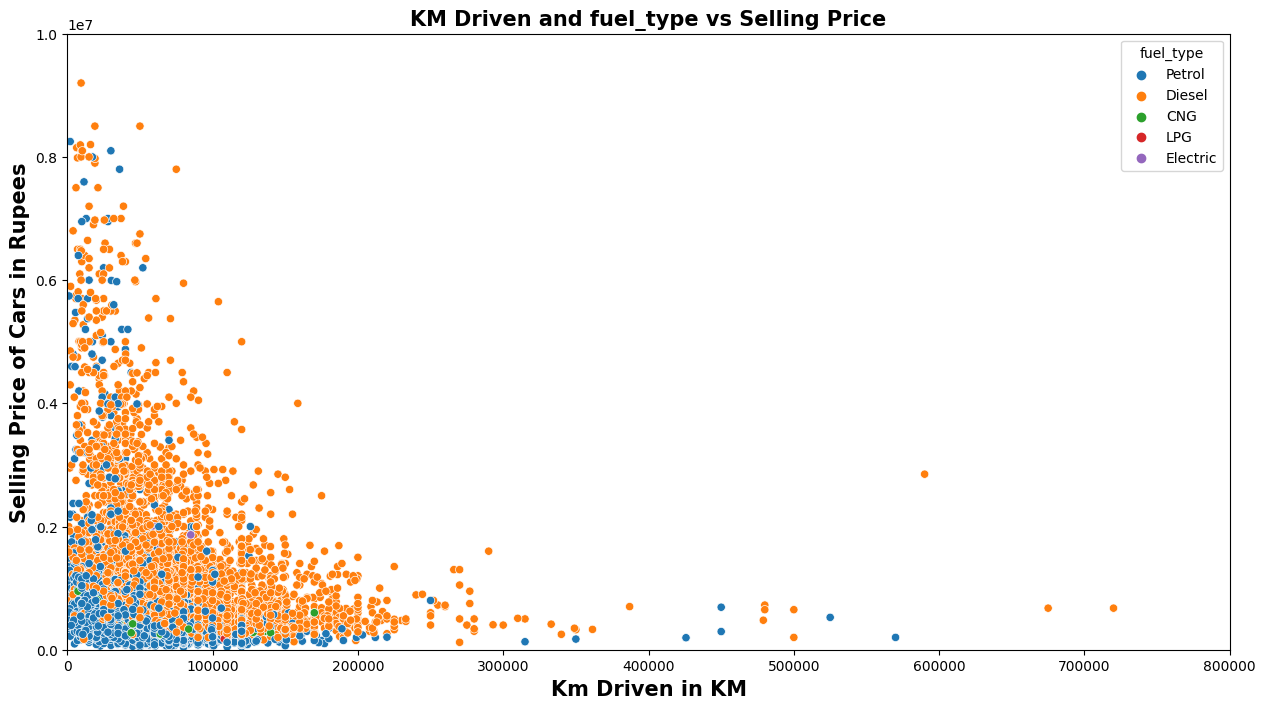

In [56]:
### Km driven wrt selling price
plt.figure(figsize=(15,8))
sns.scatterplot(y=dataset['selling_price'], x=dataset['km_driven'], hue=dataset['fuel_type'])
plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Km Driven in KM",fontsize=15, fontweight='bold')
plt.xlim(0,800000) #limit is used for scaling the axis
plt.ylim(0,10000000)
plt.title("KM Driven and fuel_type vs Selling Price",fontsize=15, fontweight='bold')
plt.show();

### Observation
+ It is difficult to sell car if Km Driven is greater than 20K.
+ As the Km driven increases the the Selling price of cars Decreases.
+ Majority of cars are either diesel or petrol.

### 3.10 KM Driven and seats vs Selling Price

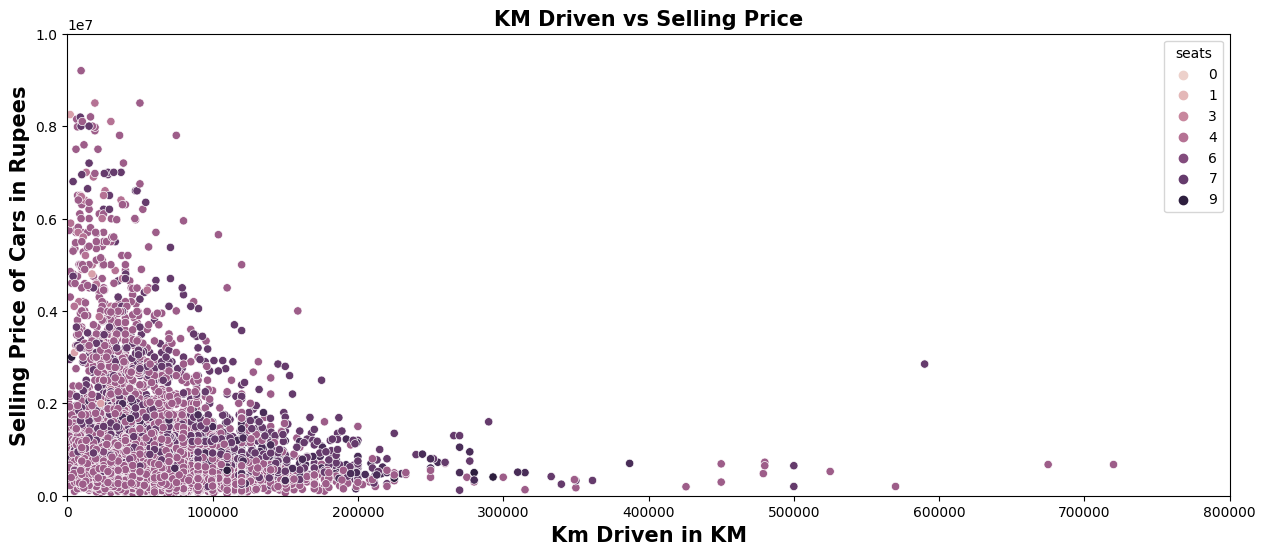

In [57]:
### Km driven wrt selling price
plt.figure(figsize=(15,6))
sns.scatterplot(y=dataset['selling_price'], x=dataset['km_driven'], hue=dataset['seats'])
plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Km Driven in KM",fontsize=15, fontweight='bold')
plt.xlim(0,800000) #limit is used for scaling the axis
plt.ylim(0,10000000)
plt.title("KM Driven vs Selling Price",fontsize=15, fontweight='bold')
plt.show();

### Observation
+ It is difficult to sell car if Km Driven is greater than 20K.
+ As the Km driven increases the the Selling price of cars Decreases.
+ Market is dominated by 3, 4 and 6 seater cars.
+ As no. of seats decreases the selling price of cars increases.

### 3.11 Numerical features and categorical features vs Selling Price

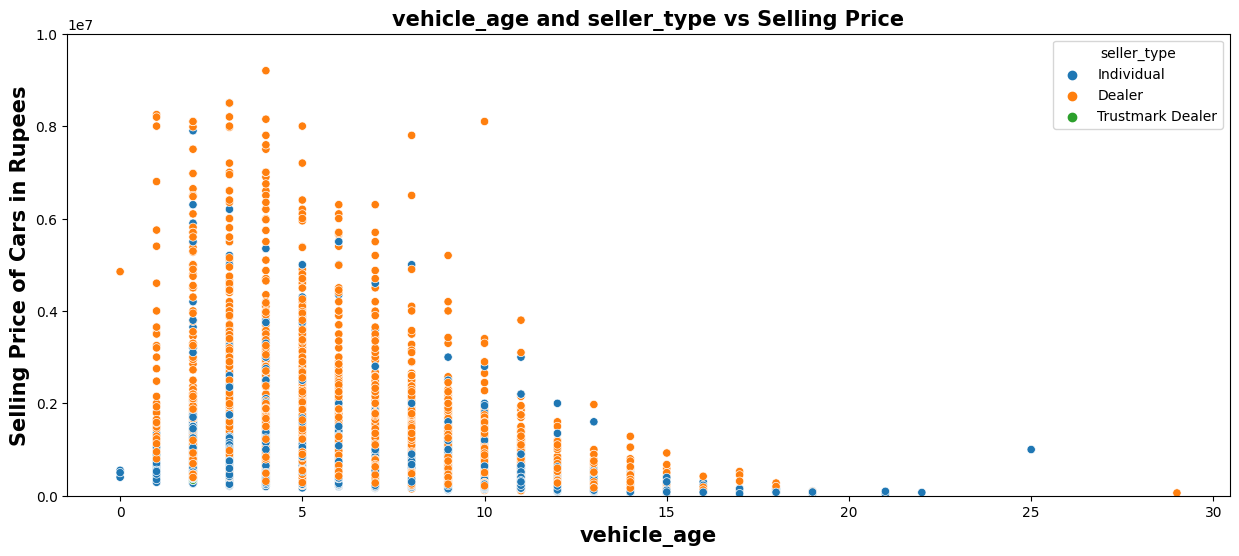

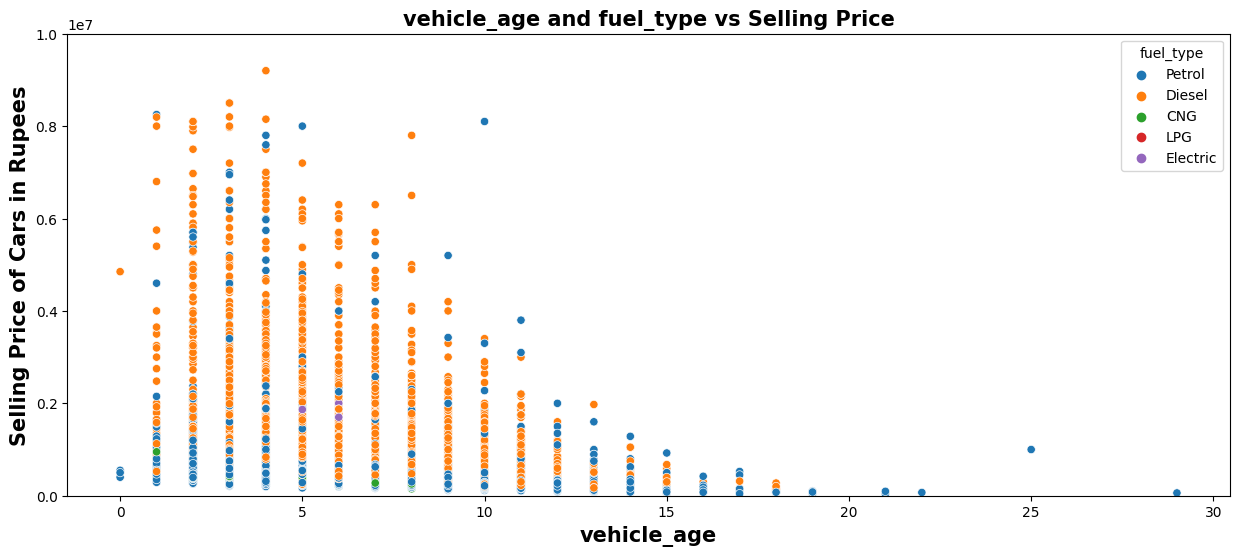

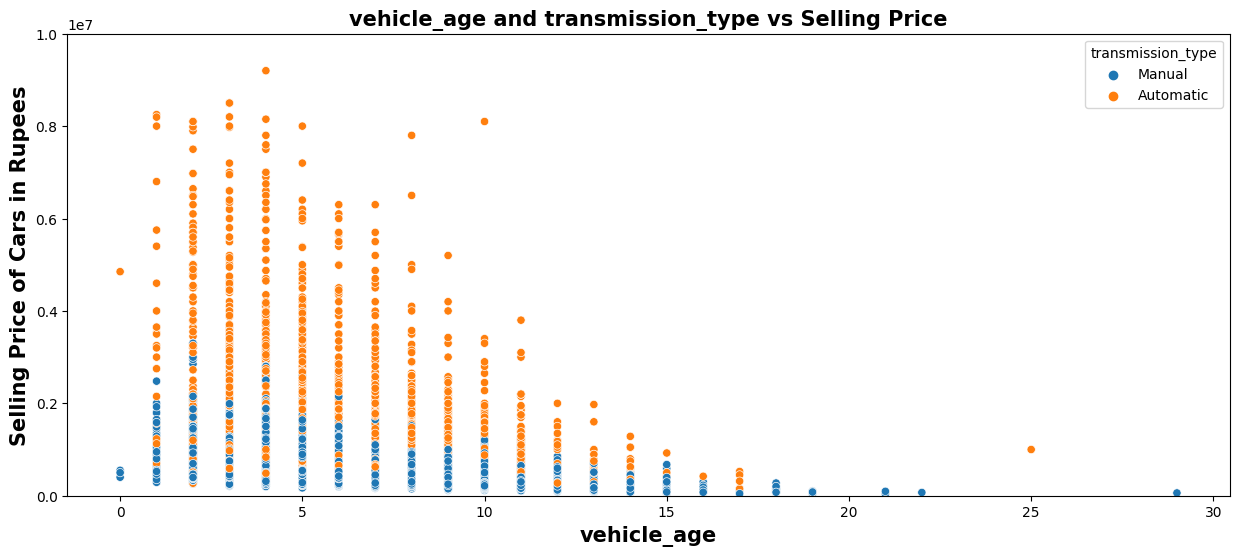

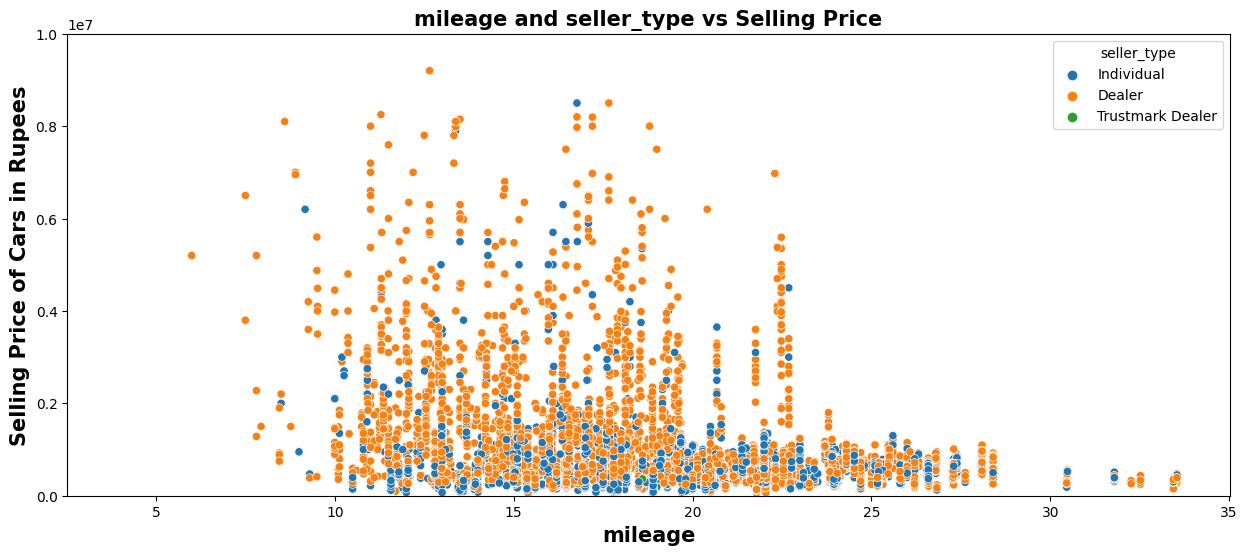

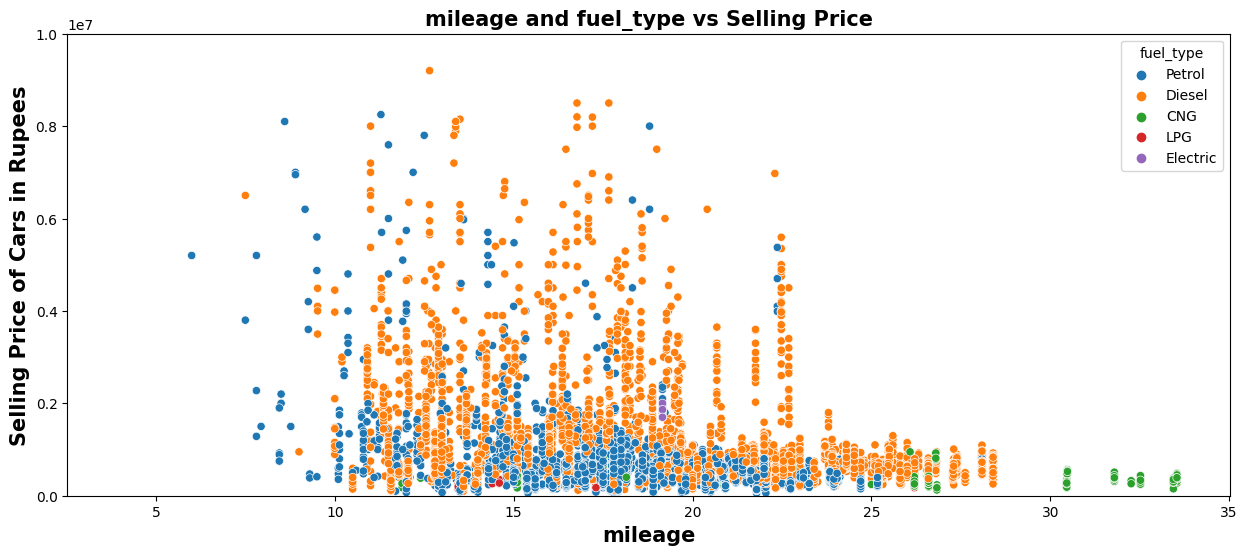

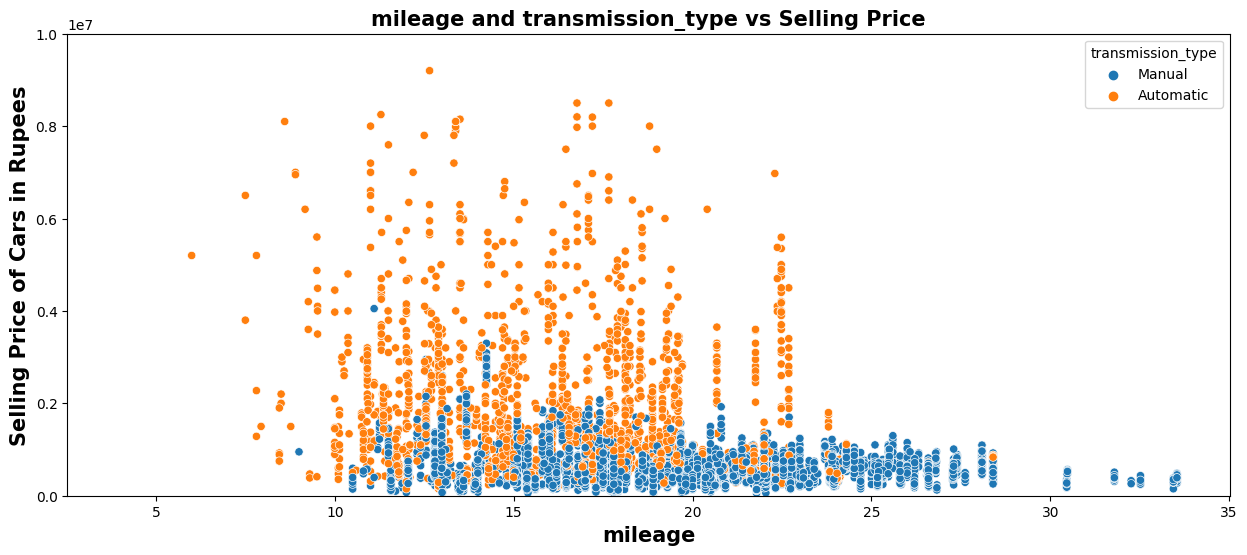

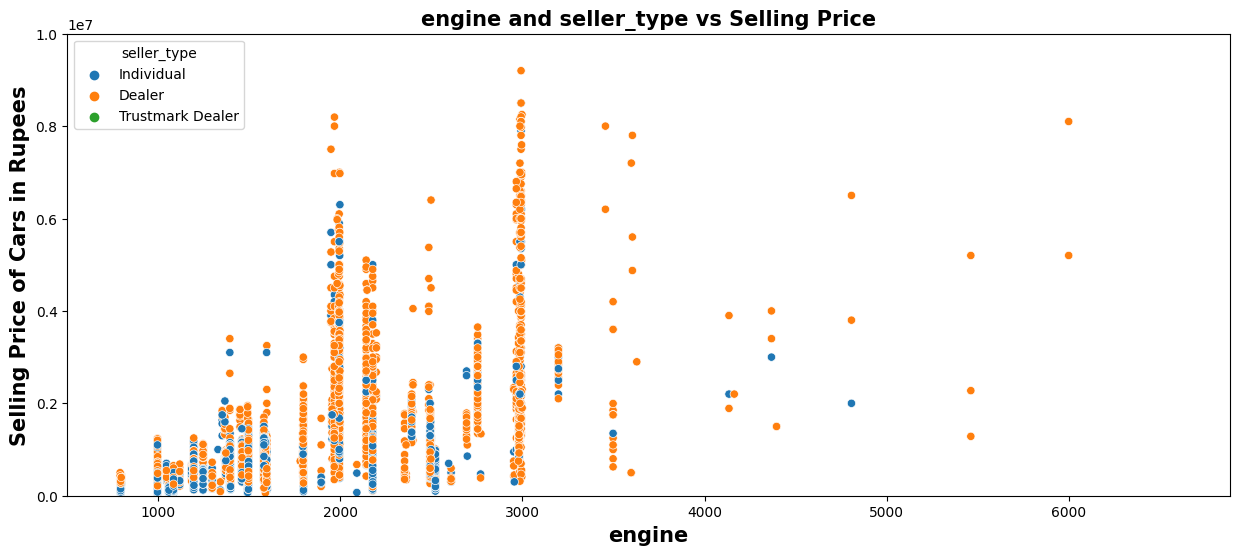

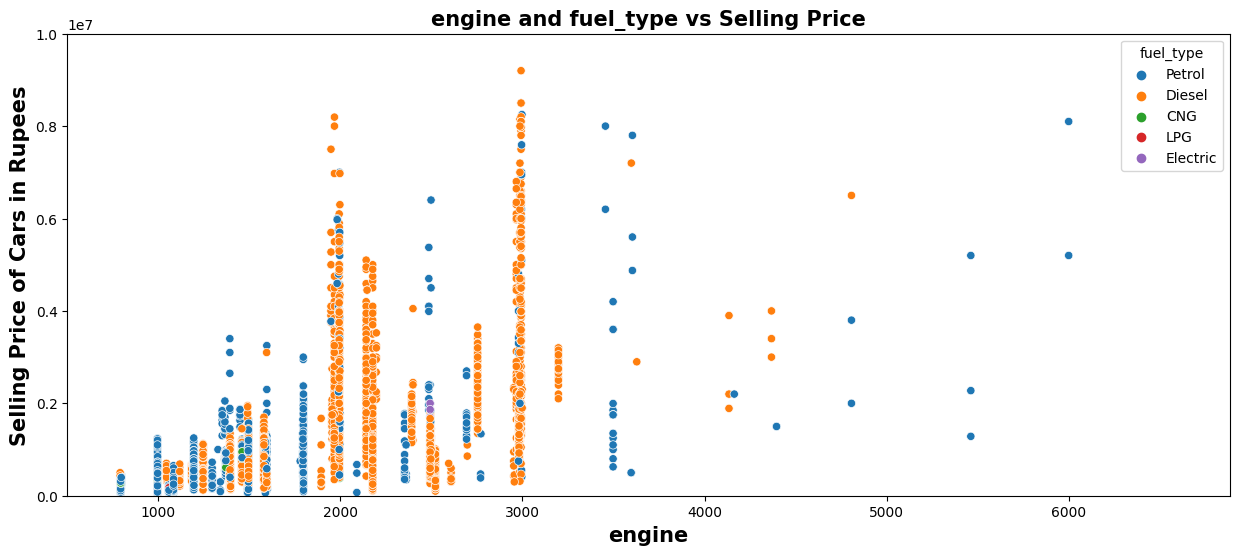

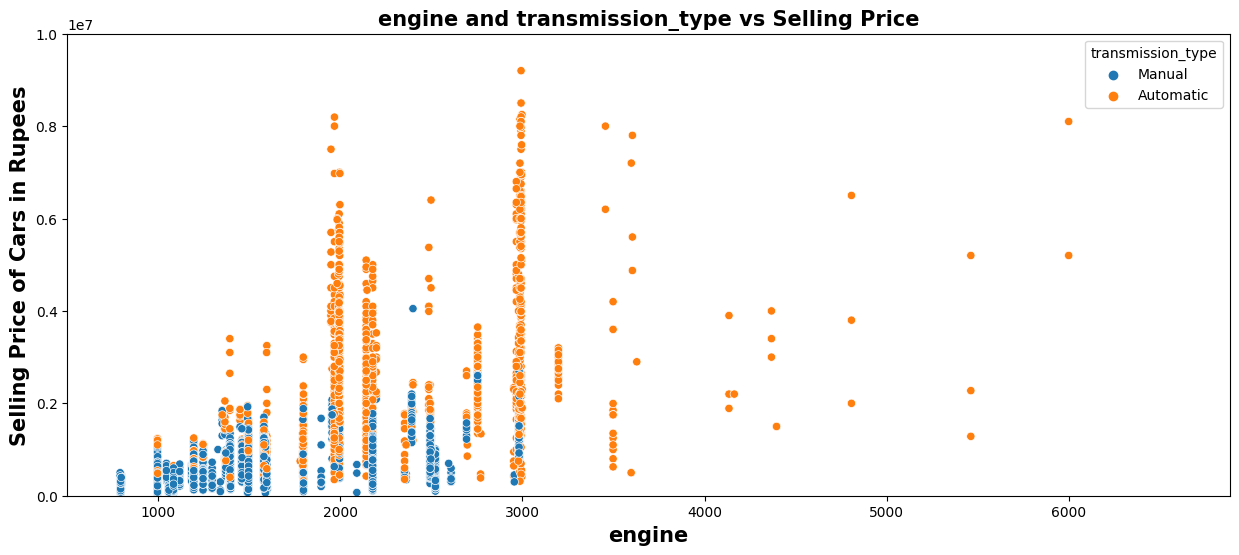

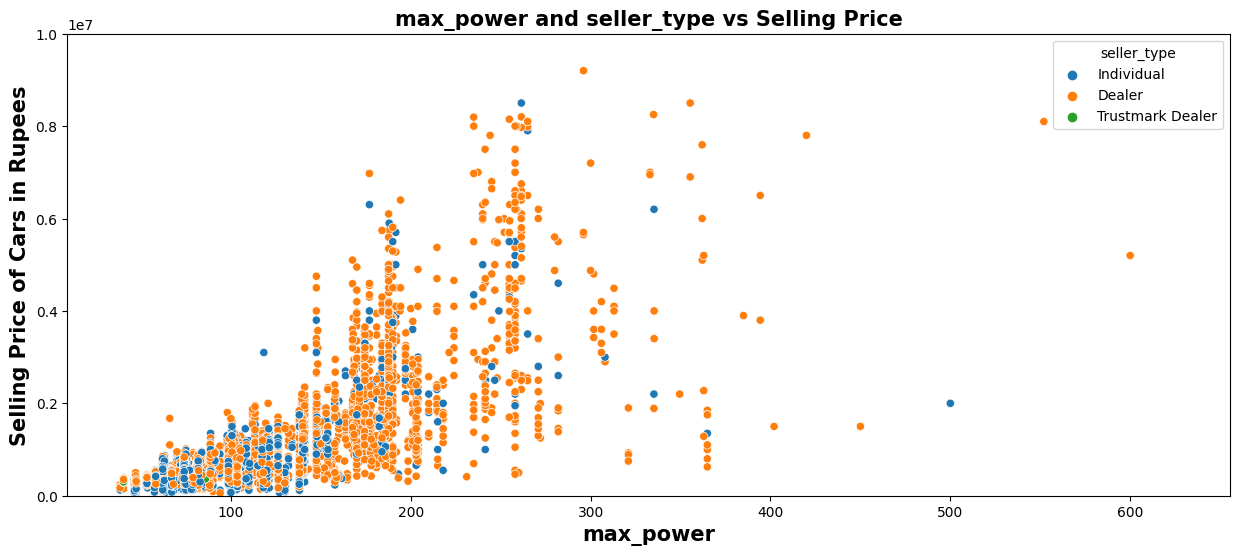

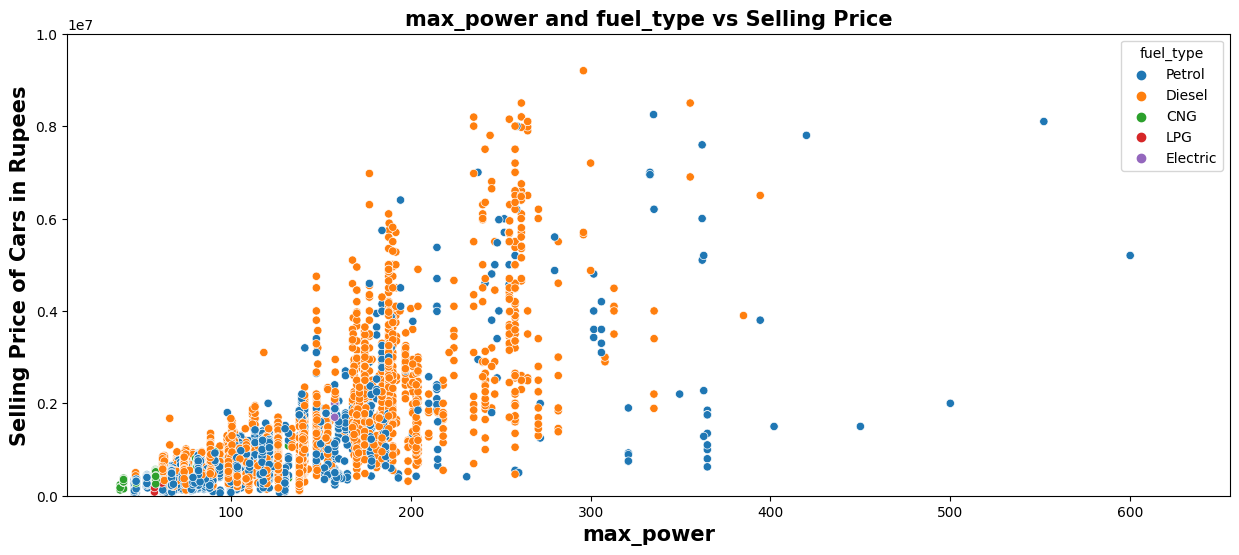

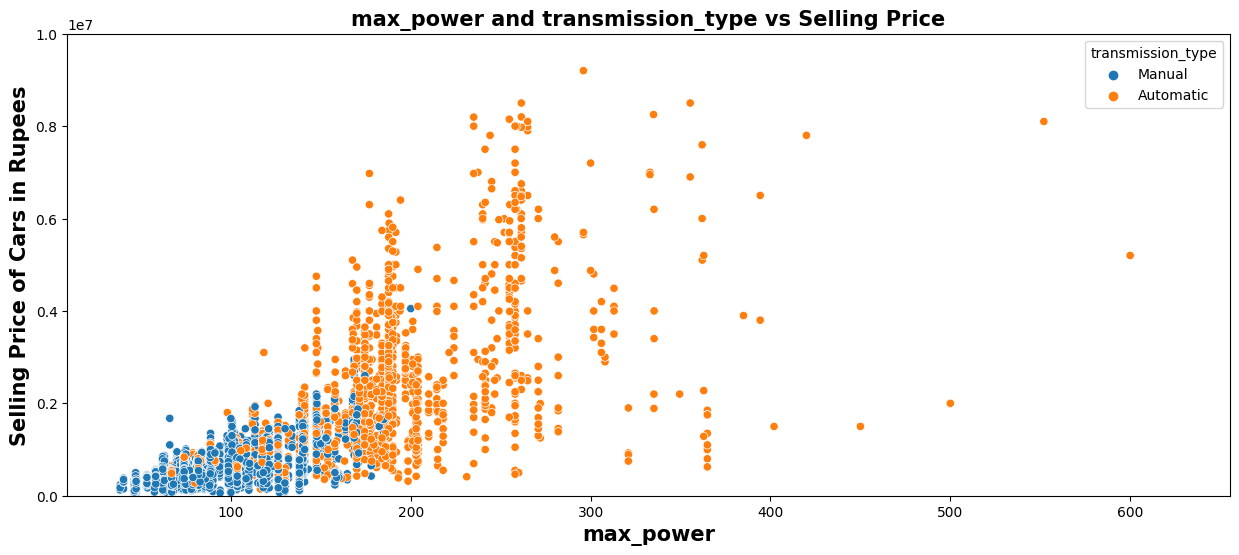

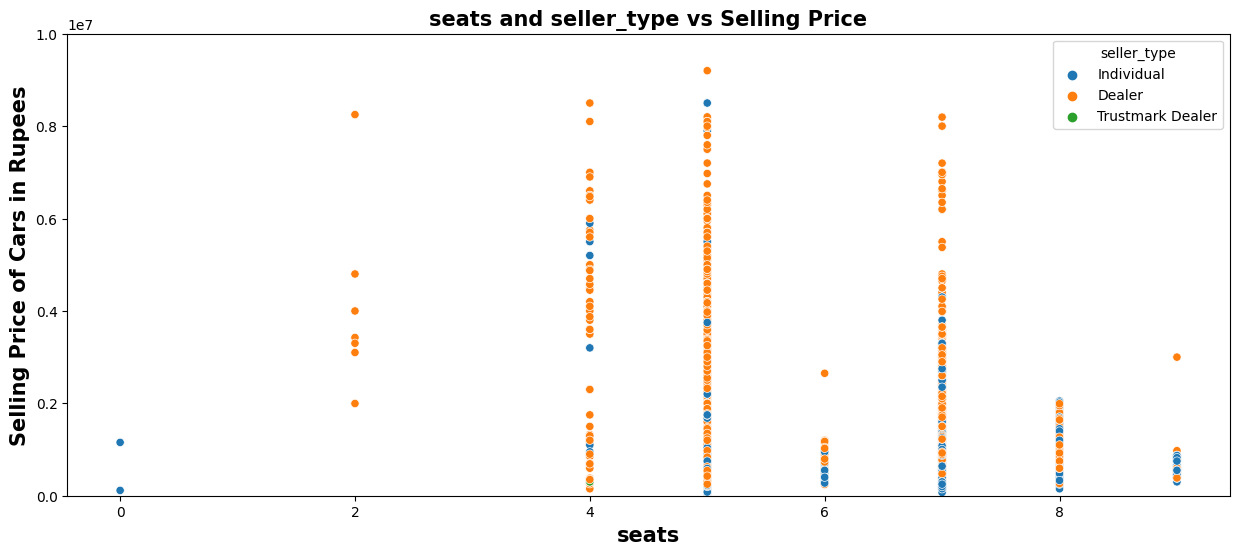

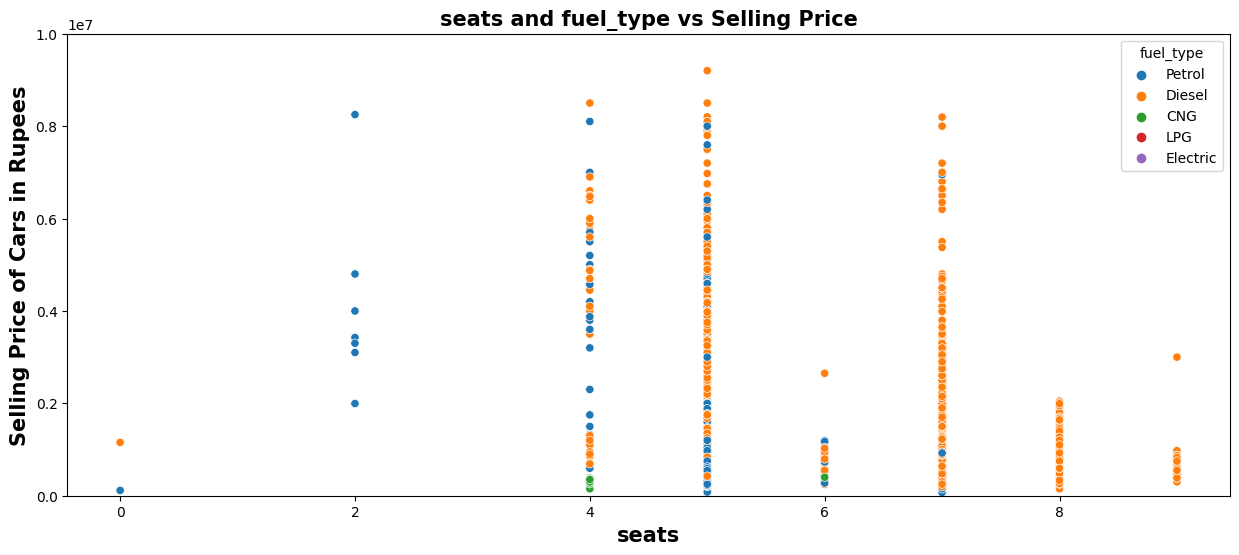

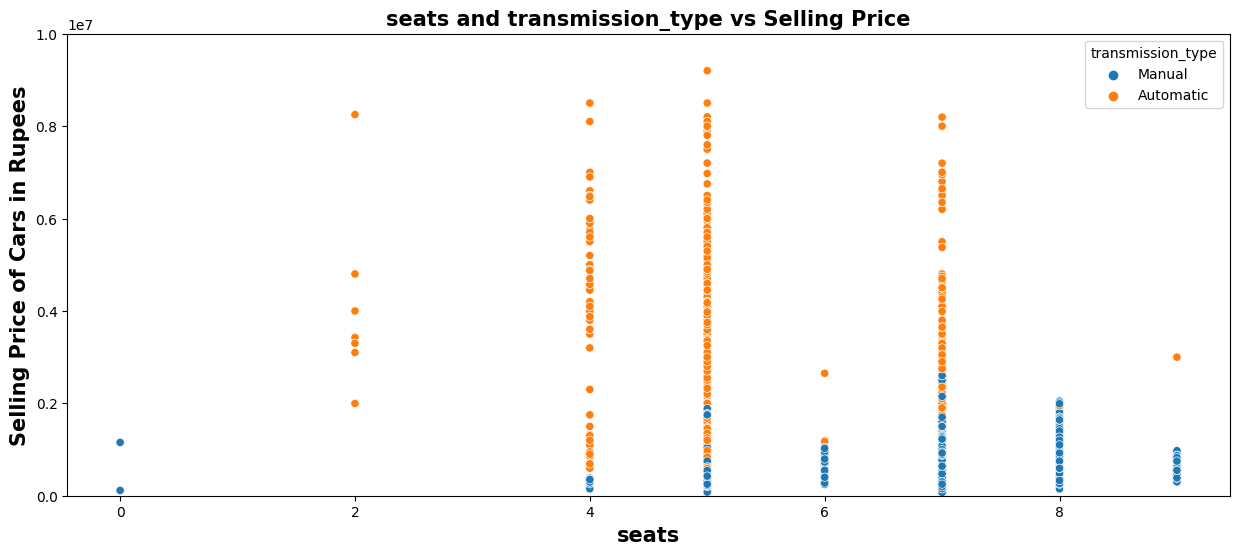

In [58]:
for i in [feature for feature in numerical_features if feature not in ['selling_price', 'km_driven']]:
    for j in ['seller_type', 'fuel_type', 'transmission_type']:
        plt.figure(figsize=(15,6))
        sns.scatterplot(y=dataset['selling_price'], x=dataset[i], hue=dataset[j])
        plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
        plt.xlabel("{}".format(i),fontsize=15, fontweight='bold')
        plt.ylim(0,10000000)
        plt.title("{} and {} vs Selling Price".format(i,j),fontsize=15, fontweight='bold')
        plt.show();

### Observation
1. As the vehicle age increase the selling price of vehicle decreases.
2. Dealers are able to sell the cars at higher price than individual owners.
3. Between 1 to 7 vehicle age seller has better chance to get a good price of car.
4. On an average disesl cars are more in demand than petrol car and they sell for higher price.
5. Majority of cars are either diesel or petrol.
6. Automatic transmission cars recieve higher selling price than manual transmission cars.
7. Majority of cars have mileage between 10 to 26 Km/Lt.
8. Cars having mileage between 10 to 20 may get higher selling price offer.
9. It is evident that CNG cars have more mileage than petrol and diesel.
10. Manual transmission cars have more Mileage in comparision to Automatic transmiossion cars.
11. Engine with 1000 to 3000 bhp get more buyer attention.
12. As the max power increases the selling price of cars also increases.
12. Majority of high power cars is sold by dealers.
13. Diesel cars have more power in comparision to Petrol cars.
14. Cars with high power generally comes with automatic transmission.
15. Majority of cars have 4,5 and 7 seats.
16. More than 6 seater car is usually diesel car.

### 3.12 Fuel Type analysis

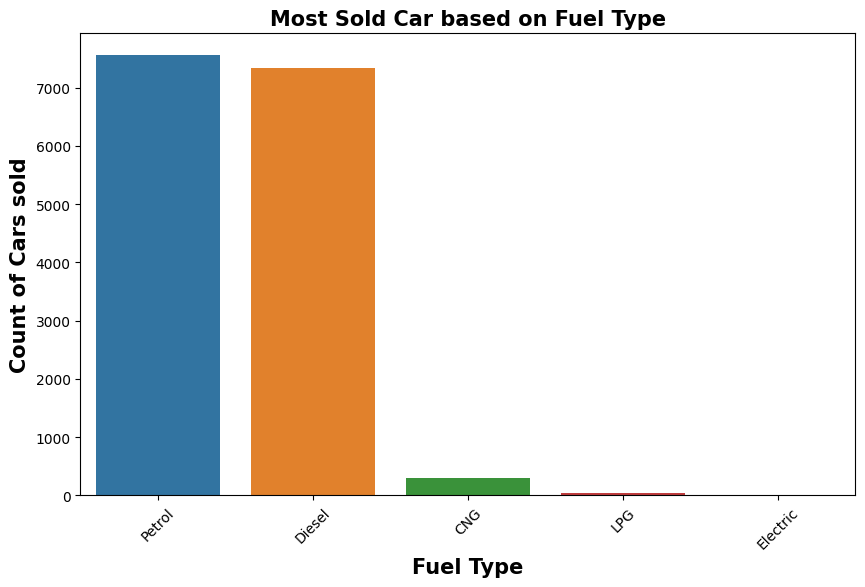

In [59]:
### most cars sold on fuel type
plt.figure(figsize=(10,6))
sns.countplot(x=dataset['fuel_type'])
plt.ylabel("Count of Cars sold",fontsize=15, fontweight='bold')
plt.xlabel("Fuel Type",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Most Sold Car based on Fuel Type",fontsize=15, fontweight='bold')
plt.show();

### Observation
1. Petrol varient have highest Number of cars followed by diesel and CNG.
2. Electric cars, CNG and LPG cars are very few in number.

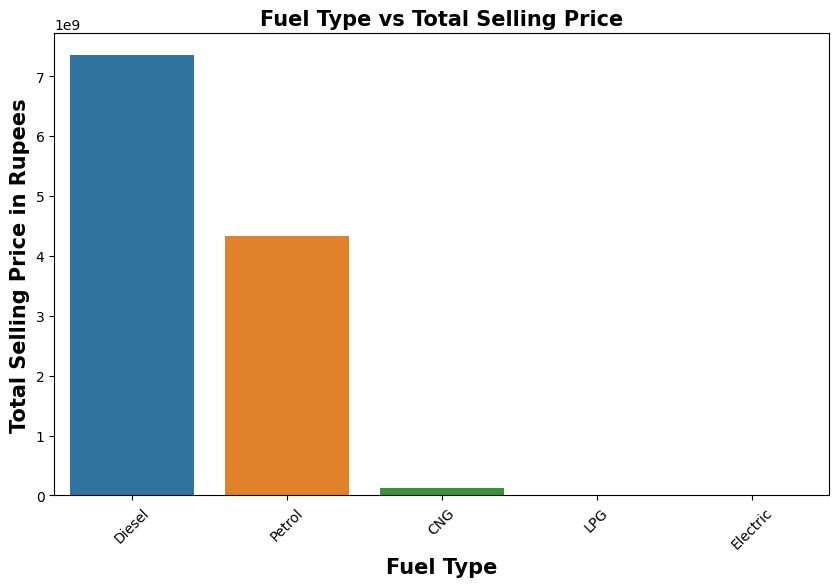

In [60]:
### fuel type vs total selling price
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('fuel_type')['selling_price'].sum().sort_values(ascending=False),
            x=dataset.groupby('fuel_type')['selling_price'].sum().sort_values(ascending=False).index)
plt.ylabel('Total Selling Price in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Fuel Type",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Fuel Type vs Total Selling Price",fontsize=15, fontweight='bold')
plt.show();

### Observation
1. Diesel cars have highest total sales followed by petrol.
2. The combined total sales of CNG, LPG and Electric is negligible as compared to Diesel and Petrol.

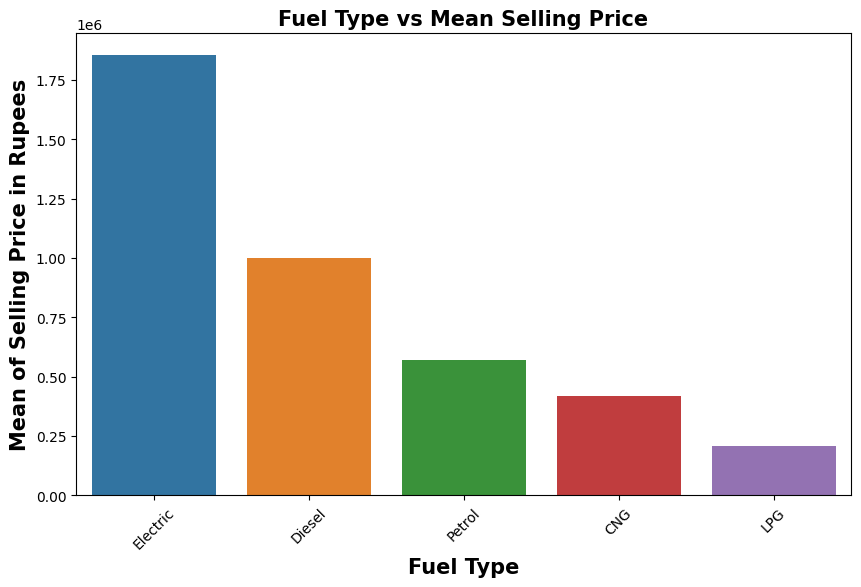

In [61]:
### fuel type vs average selling price
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False),
            x=dataset.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False).index)
plt.ylabel('Mean of Selling Price in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Fuel Type",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Fuel Type vs Mean Selling Price",fontsize=15, fontweight='bold')
plt.show();

### Observation
1. Electric cars have highest average selling price followed by Diesel and Petrol.
2. LPG has least average selling price.
3. Electric vehicles are twice costlier than diesel car and thrice costlier than petrol cars.

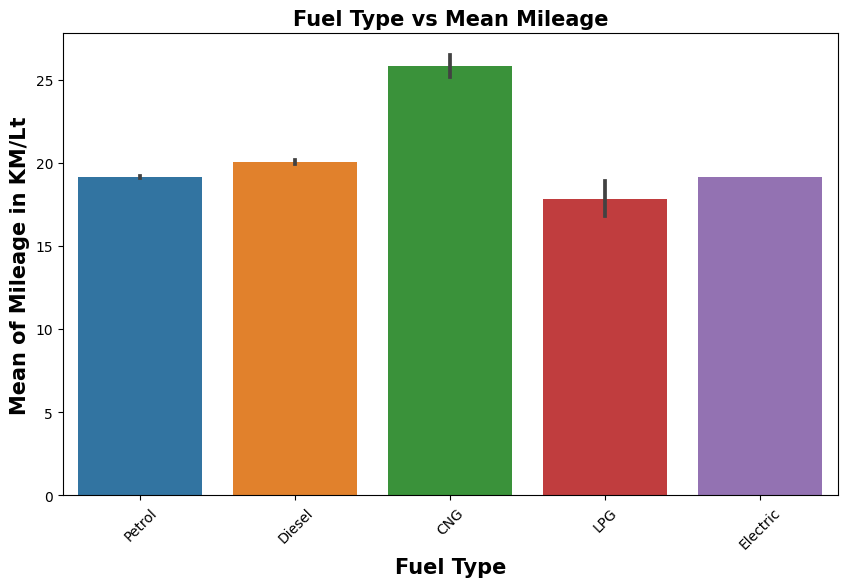

In [62]:
### Fuel Type vs Average Mileage
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['mileage'],
            x=dataset['fuel_type'])
plt.ylabel('Mean of Mileage in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Fuel Type",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Fuel Type vs Mean Mileage",fontsize=15, fontweight='bold')
plt.show();

### Observation
1. CNG cars have highest average Mileage followed by diesel, petrol and electric cars.
2. LPG has least average Mileage.

### 3.13 Vehicle age vs Selling Price

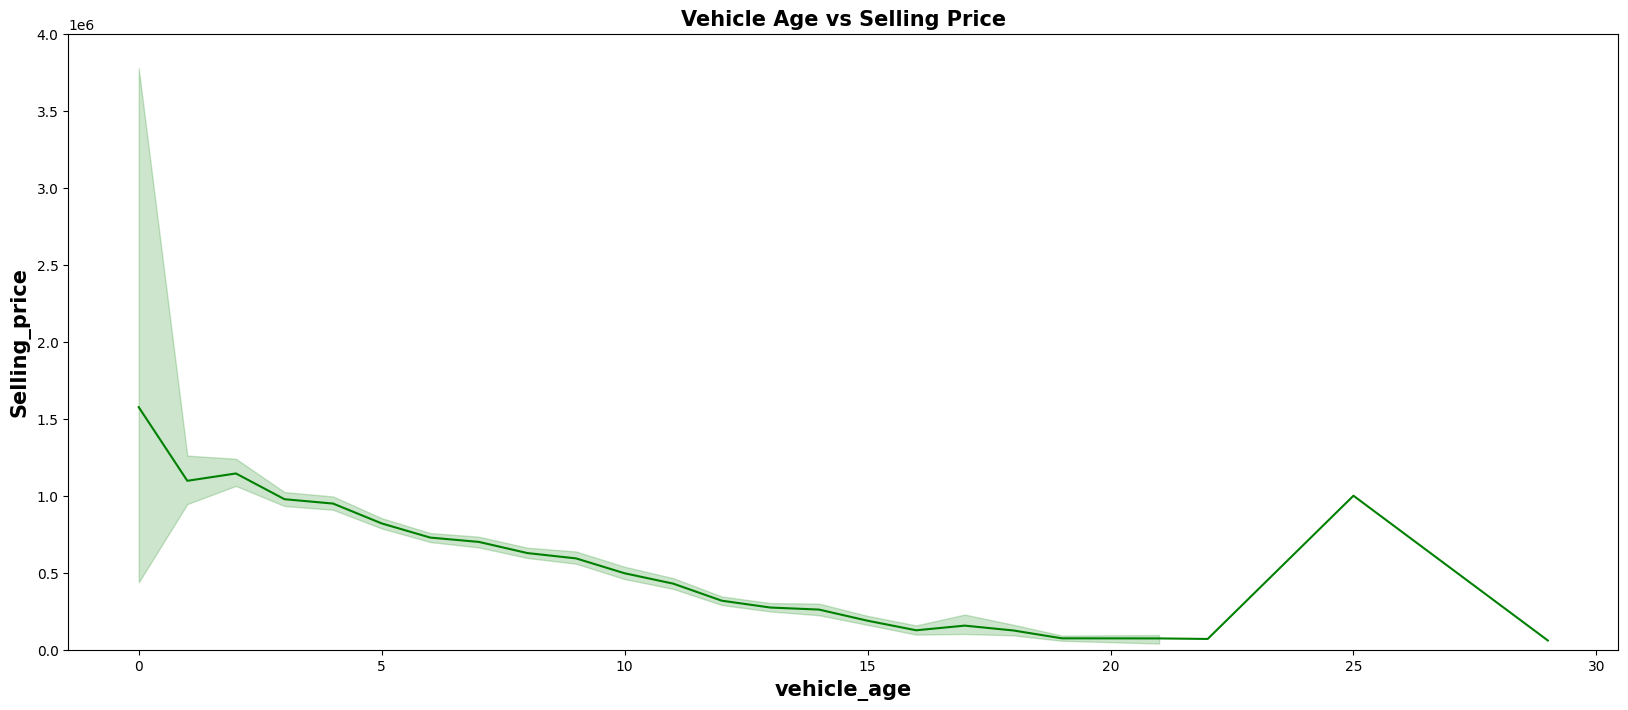

In [63]:
plt.subplots(figsize=(20,8))
sns.lineplot(x=dataset['vehicle_age'],y=dataset['selling_price'], color='green')
plt.ylabel('Selling_price', fontsize=15, fontweight='bold')
plt.xlabel('vehicle_age', fontsize=15, fontweight='bold')
plt.title('Vehicle Age vs Selling Price', fontsize=15, fontweight='bold')
plt.ylim(0,4000000)
plt.show()

### Observation
+ As the vehicle age increases the selling price of vehicles decreases.
+ The exception is for cars having age between 22 to 25 years.

### 3.14 Vehicle age vs Mileage

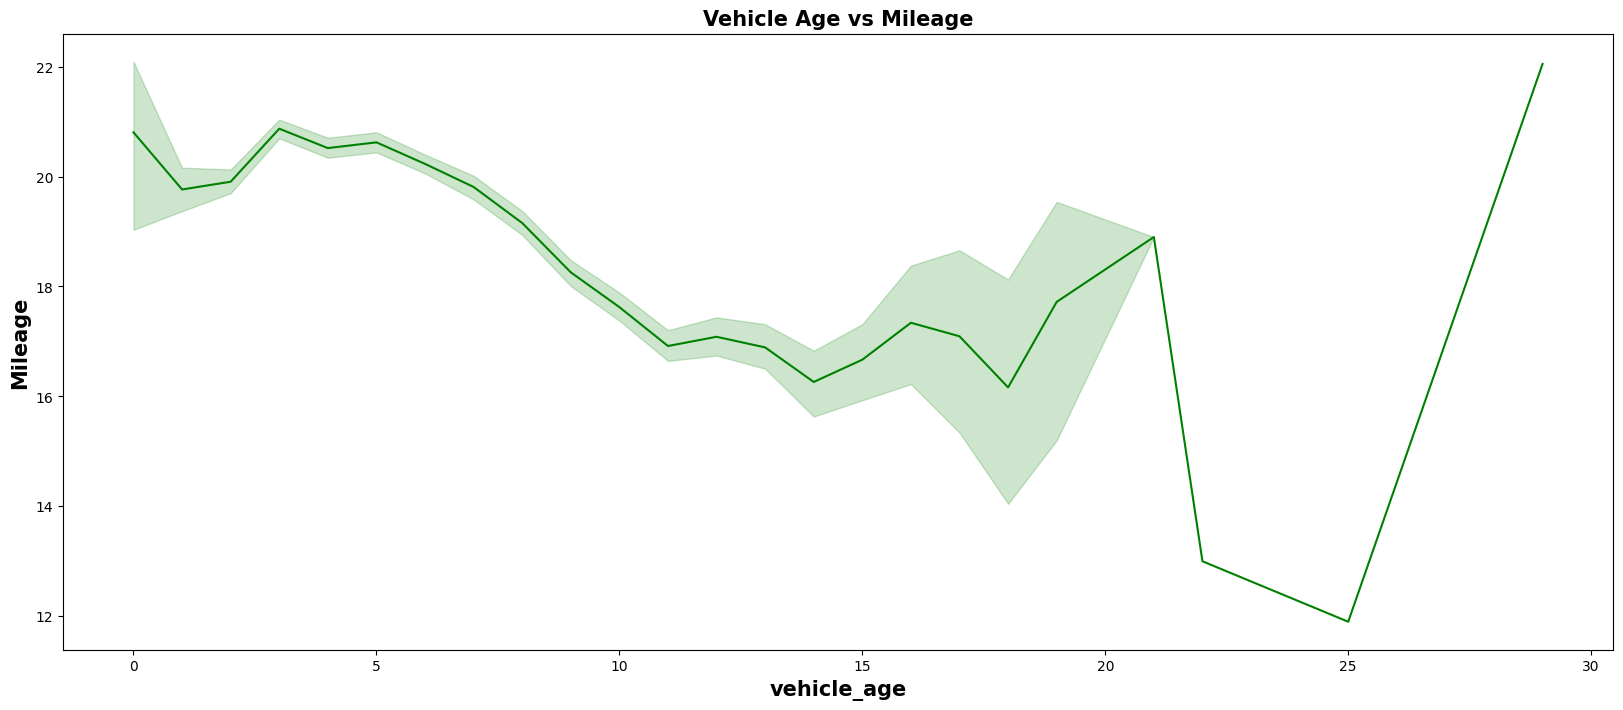

In [64]:
plt.subplots(figsize=(20,8))
sns.lineplot(x=dataset['vehicle_age'],y=dataset['mileage'], color='green')
plt.ylabel('Mileage', fontsize=15, fontweight='bold')
plt.xlabel('vehicle_age', fontsize=15, fontweight='bold')
plt.title('Vehicle Age vs Mileage', fontsize=15, fontweight='bold')
plt.show()

### Observation
+ As the vehicle age increases the Average mileage decreases.

### 3.15 Correlation between Numerical Features and Dependent Feature

In [85]:
corr = round(dataset.corr(),2)
corr

vehicle_age  km_driven  mileage  engine  max_power  seats  \
vehicle_age           1.00       0.33    -0.26    0.10       0.00   0.03   
km_driven             0.33       1.00    -0.10    0.19       0.04   0.19   
mileage              -0.26      -0.10     1.00   -0.63      -0.53  -0.44   
engine                0.10       0.19    -0.63    1.00       0.81   0.55   
max_power             0.00       0.04    -0.53    0.81       1.00   0.17   
seats                 0.03       0.19    -0.44    0.55       0.17   1.00   
selling_price        -0.24      -0.08    -0.31    0.59       0.75   0.12   

               selling_price  
vehicle_age            -0.24  
km_driven              -0.08  
mileage                -0.31  
engine                  0.59  
max_power               0.75  
seats                   0.12  
selling_price           1.00

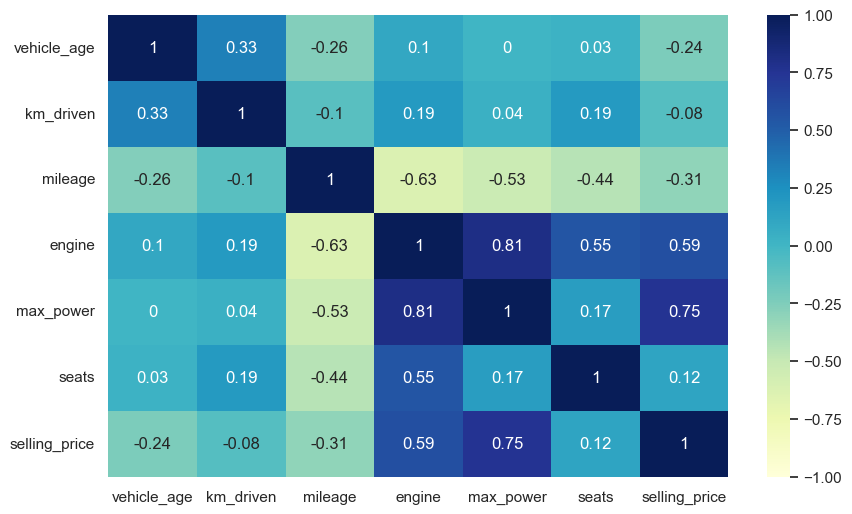

In [87]:
### Plotting heatmap for visualising the correlation between features
sns.heatmap(data=corr, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

### Observation
+ Selling Price has negative correlation with vehicle age, Km driven, and Mileage.
+ Engine and Max power have moderate correlation with Selling Price.
+ Max Power and engine have high correlation.
+ Km Driven, Vehicle age and Seats have very less correlation with selling price.

### 3.16 Outliers in Numerical Features

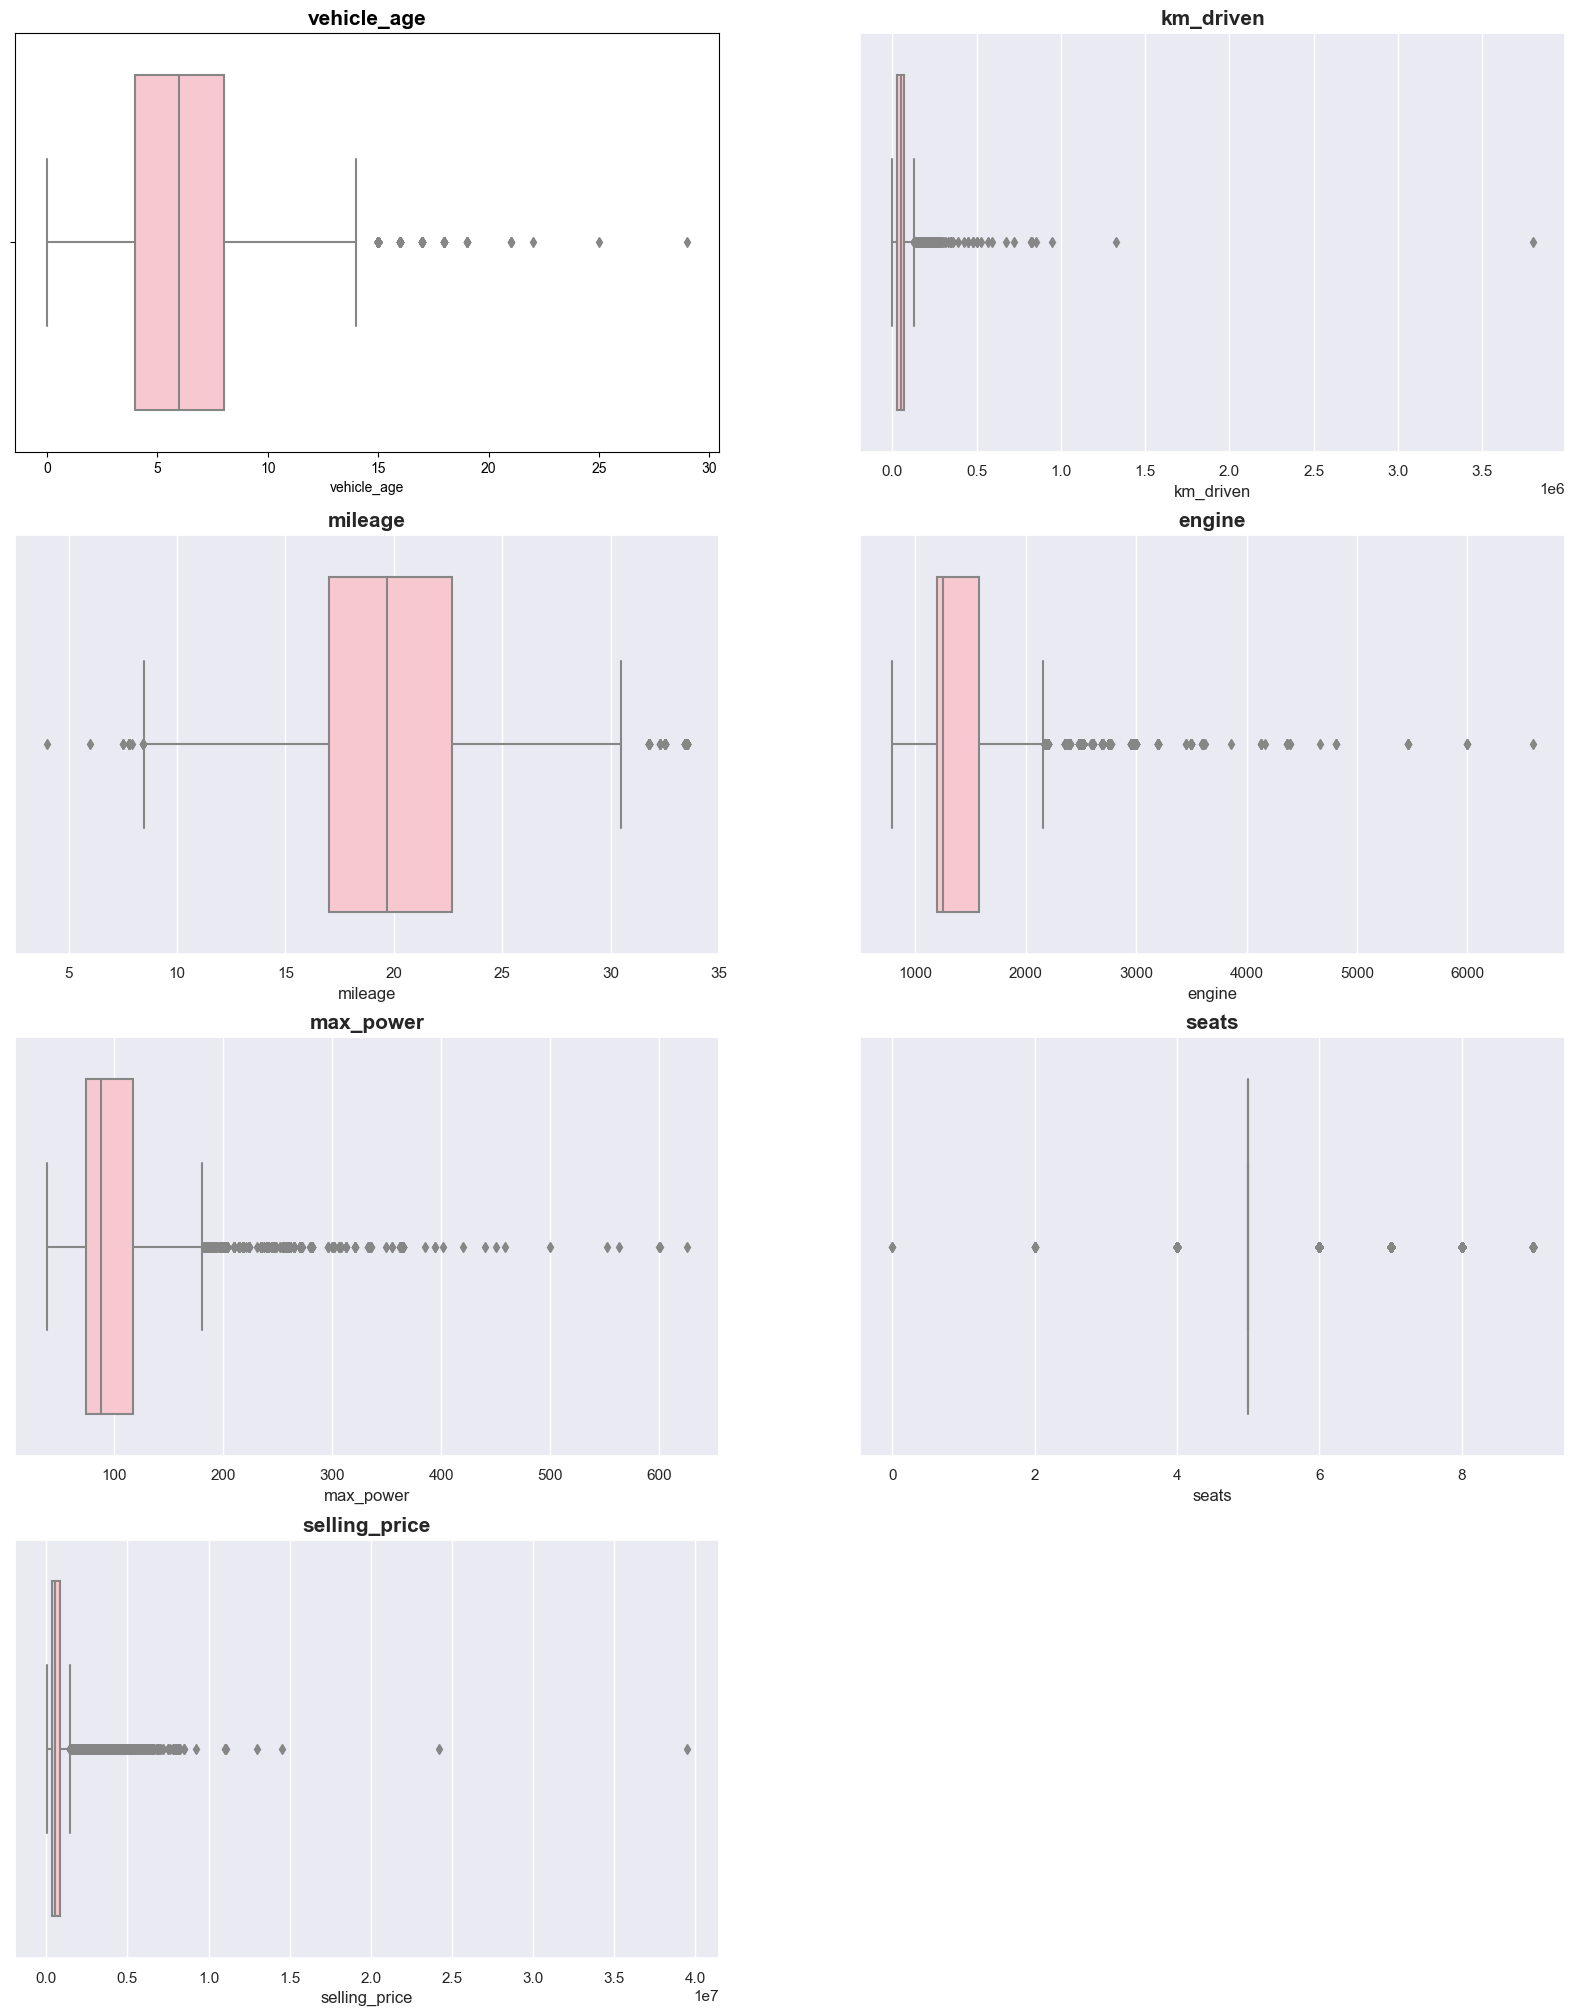

In [67]:
### Checking outliers in numerical features

plt.figure(figsize=(20,25))
for feature in enumerate(numerical_features):
    plt.subplot(4, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='pink')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

### Observation
1. Km driven, Max Power and Selling price has large no. of outliers on upper limit side.
2. Vehicle age and engine have less outliers as compared to above features.
3. Mileage has outliers on both sides.

### 4.0 Preprocessing and Model

In [88]:
### dropping brand and model as these details are present in car_name feature
dataset.drop(['brand', 'model'], axis=1, inplace=True)
dataset.head()

car_name  vehicle_age  km_driven seller_type fuel_type  \
0    Maruti Alto            9     120000  Individual    Petrol   
1  Hyundai Grand            5      20000  Individual    Petrol   
2    Hyundai i20           11      60000  Individual    Petrol   
3    Maruti Alto            9      37000  Individual    Petrol   
4  Ford Ecosport            6      30000      Dealer    Diesel   

  transmission_type  mileage  engine  max_power  seats  selling_price  
0            Manual    19.70     796      46.30      5         120000  
1            Manual    18.90    1197      82.00      5         550000  
2            Manual    17.00    1197      80.00      5         215000  
3            Manual    20.92     998      67.10      5         226000  
4            Manual    22.77    1498      98.59      5         570000

### 4.1 Handling Outliers in Continuous features

In [89]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [90]:
### getting list of continuous features
continuous_features=[feature for feature in [feature for feature in dataset.columns if dataset[feature].dtypes!='O'] if len(dataset[feature].unique())>25]
continuous_features

['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']

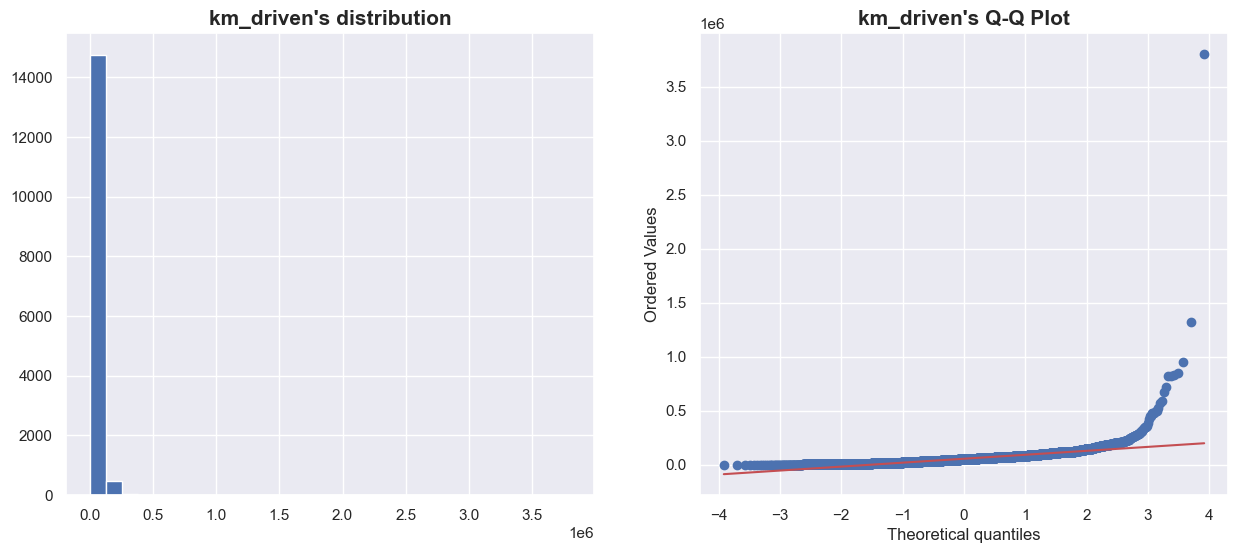

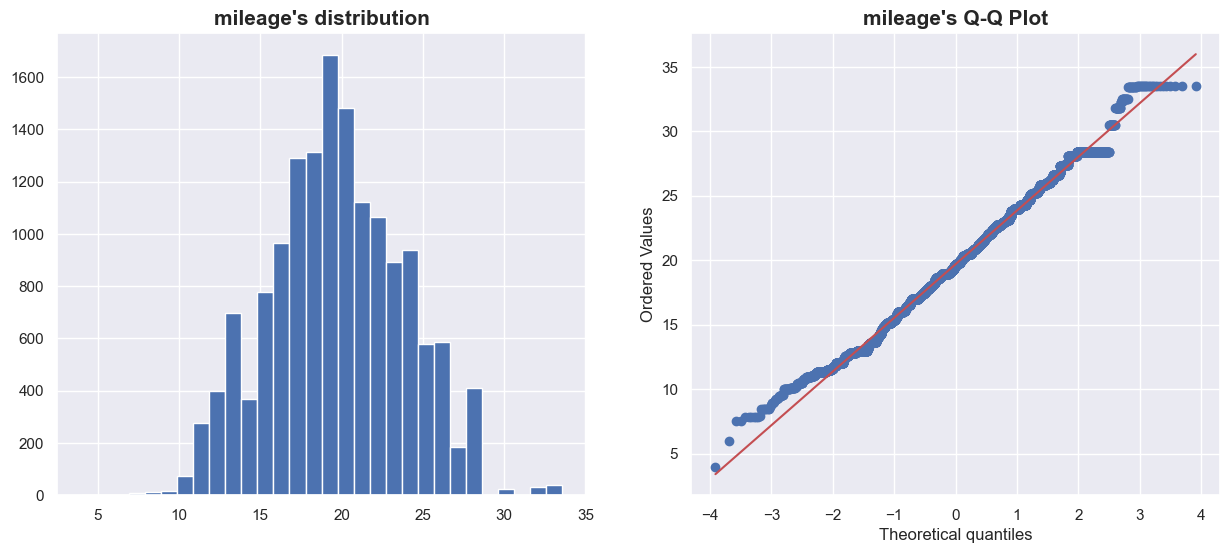

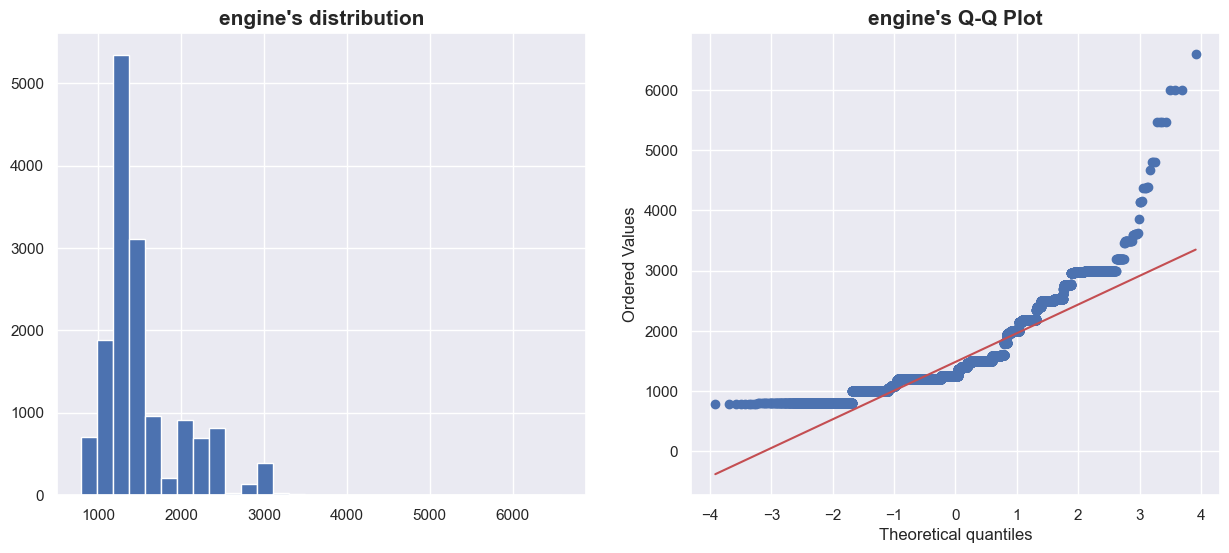

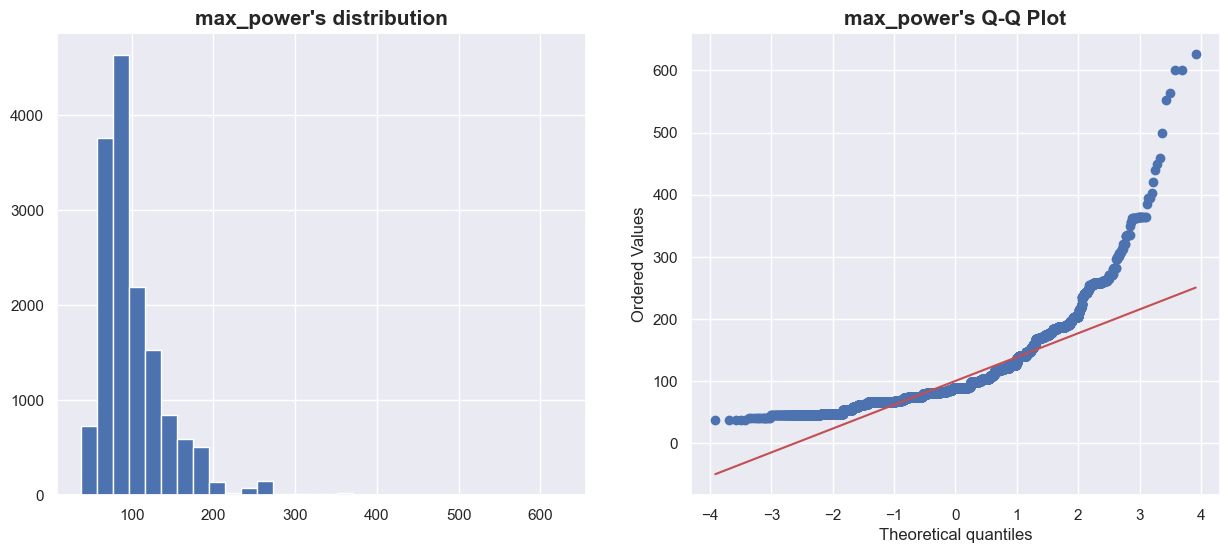

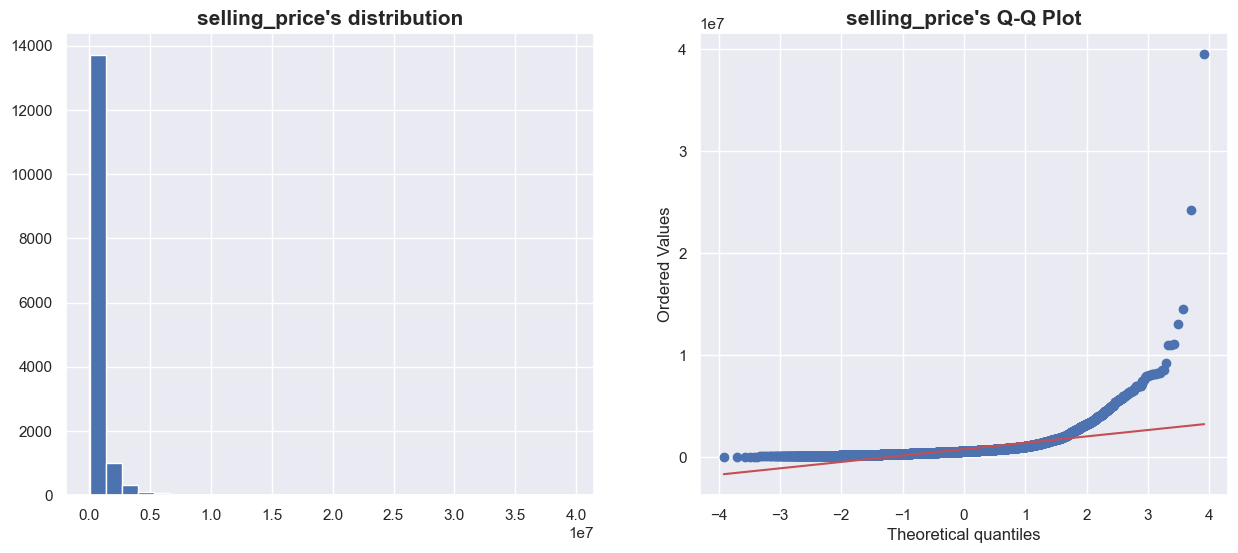

In [94]:
### Checking distribution of continuous features before outlier capping

for feature in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.hist(data=dataset, x=feature, bins=30)
    plt.title("{}'s distribution".format(feature),fontweight="bold", fontsize=15)
    
    plt.subplot(122)
    stats.probplot(dataset[feature], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(feature),fontweight="bold", fontsize=15)
    plt.show();

### Observation
1. Vehicle age, Km Driven, Engine, max_power and selling price have right skewed distribution.
2. Mileage has close to normal distribution just a little bit right skewness is present.
3. Seat is a discreate feature.

In [95]:
### Capping outliers from continuous features
for feature in continuous_features:
    dataset=remove_outliers(dataset, feature)

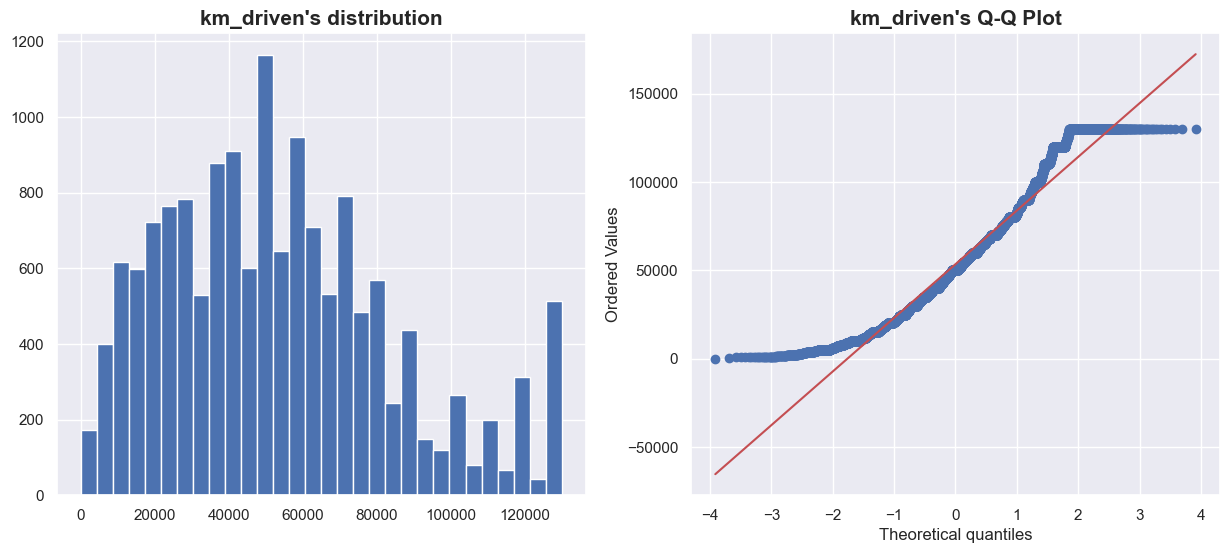

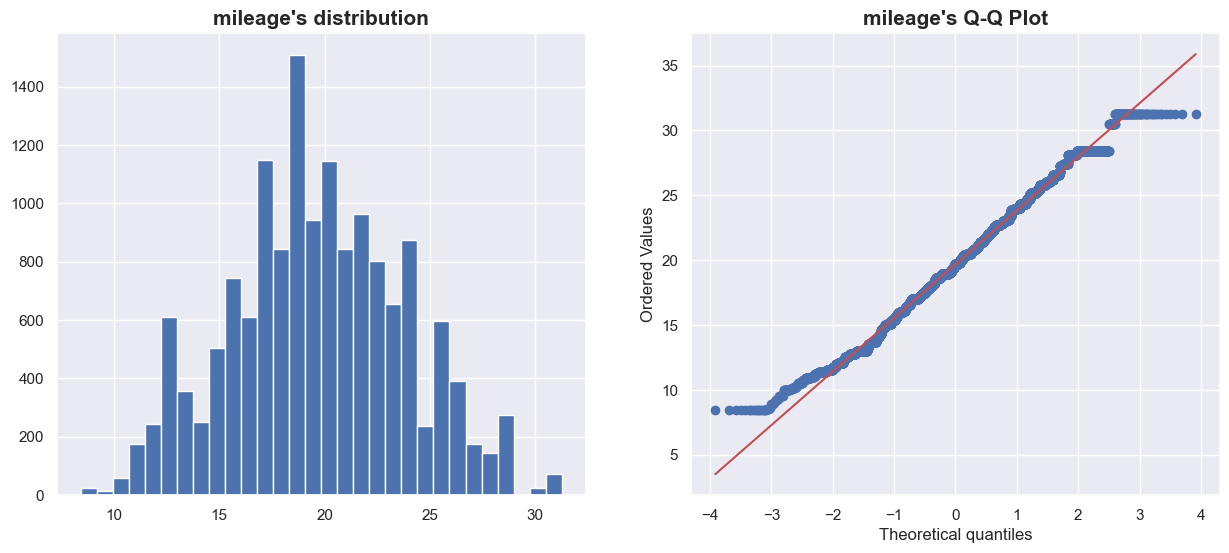

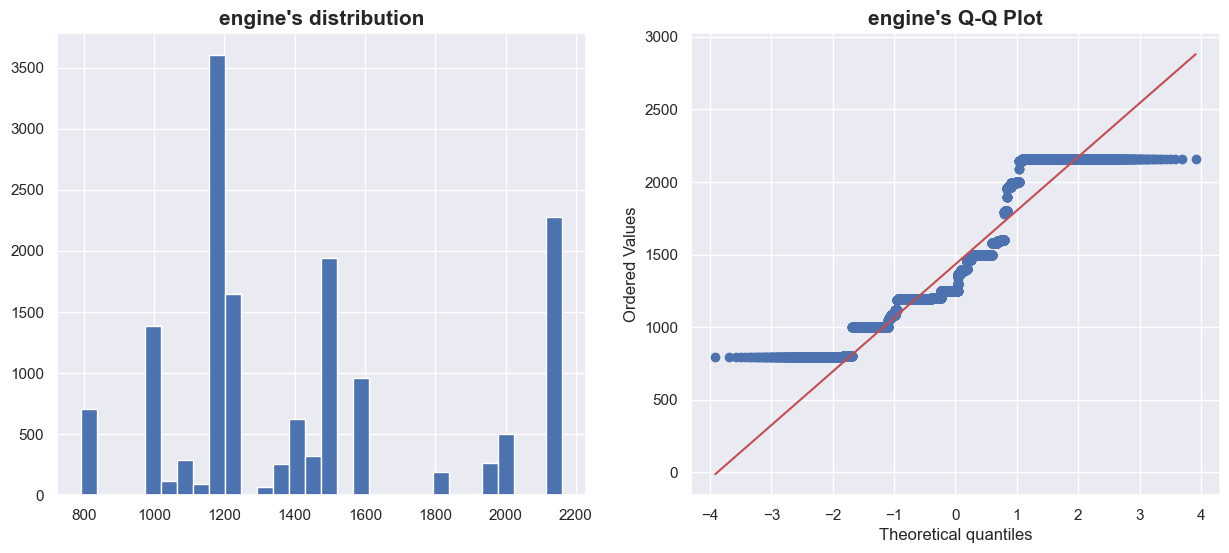

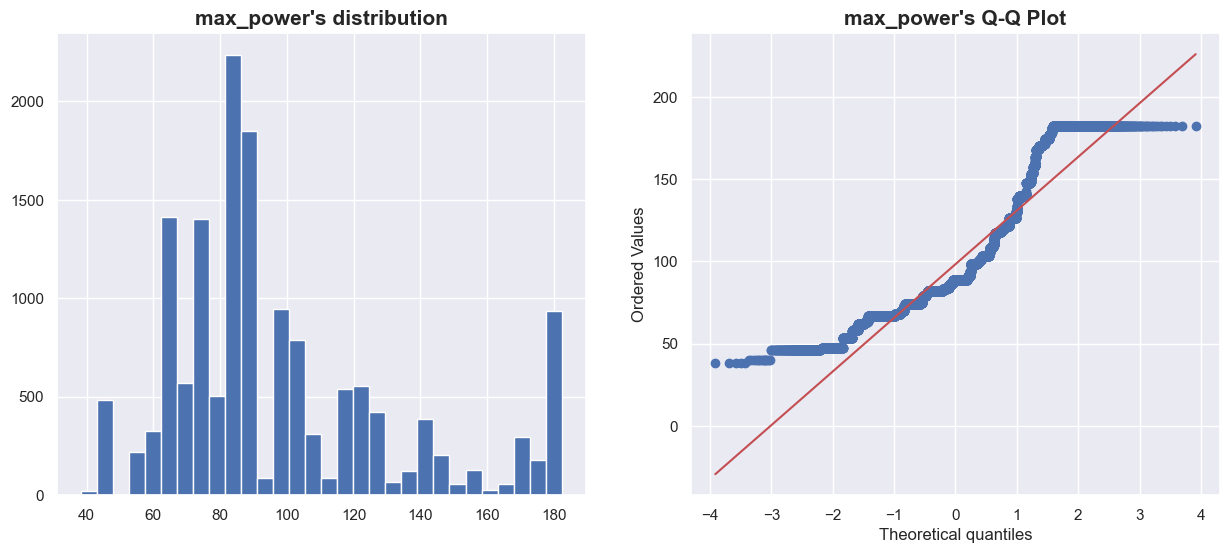

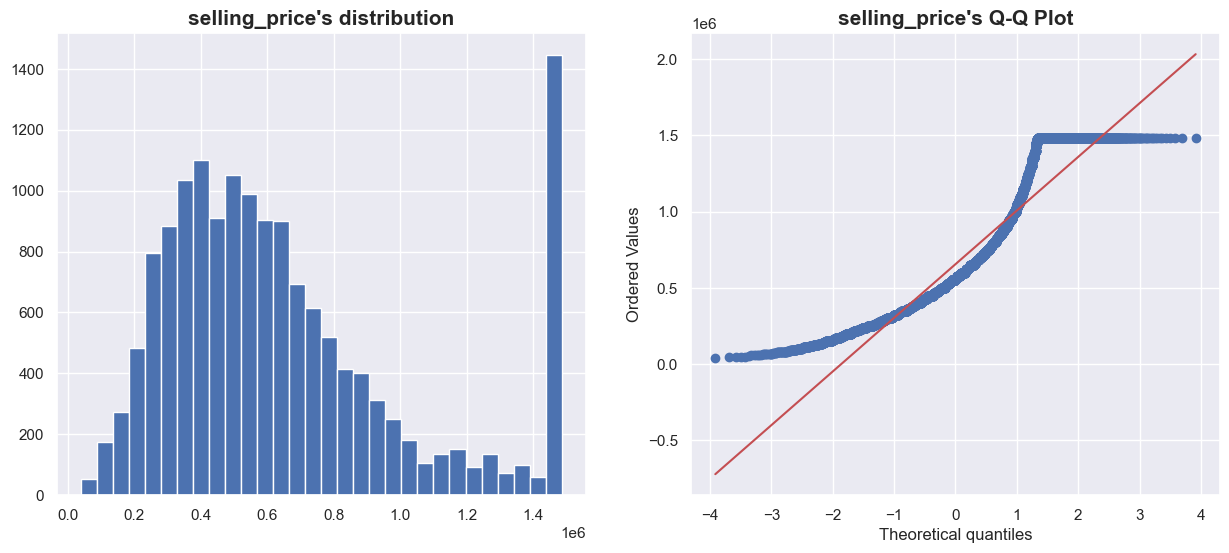

In [96]:
### Checking distribution of continuous features after outlier capping

for feature in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.hist(data=dataset, x=feature, bins=30)
    plt.title("{}'s distribution".format(feature),fontweight="bold", fontsize=15)
    
    plt.subplot(122)
    stats.probplot(dataset[feature], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(feature),fontweight="bold", fontsize=15)
    plt.show();

### 4.2 Feature Scaling and Encoding

In [97]:
### creating list of features for scaling and encoding
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and feature not in ['selling_price']]
onehot_enc_col= ['seller_type','fuel_type','transmission_type']
binary_enc_col= ['car_name']

In [102]:
### Standard scalar Object for feature scaling
scalar = StandardScaler()

### one hot encoder object for 2 or 3 categories at max
onehot_enc = OneHotEncoder()

### using binary encoder for car_name feature as this has many categories
binary_enc = BinaryEncoder()

### Creating column transformer to implement above objects
column_transformer = ColumnTransformer(
    [
        ("OneHotEncoder", onehot_enc, onehot_enc_col),
         ("StandardScaler", scalar, numerical_features),
        ("BinaryEncoder", binary_enc, binary_enc_col)
        
    ]
)

In [103]:
### 4.3 Seperating Independent and Dependent features

In [104]:
### Splitting independent and dependent features
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head()

car_name  vehicle_age  km_driven seller_type fuel_type  \
0    Maruti Alto            9     120000  Individual    Petrol   
1  Hyundai Grand            5      20000  Individual    Petrol   
2    Hyundai i20           11      60000  Individual    Petrol   
3    Maruti Alto            9      37000  Individual    Petrol   
4  Ford Ecosport            6      30000      Dealer    Diesel   

  transmission_type  mileage  engine  max_power  seats  
0            Manual    19.70   796.0      46.30      5  
1            Manual    18.90  1197.0      82.00      5  
2            Manual    17.00  1197.0      80.00      5  
3            Manual    20.92   998.0      67.10      5  
4            Manual    22.77  1498.0      98.59      5

In [105]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

### 4.4 Train Test Split

In [108]:
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train.head(3)

car_name  vehicle_age  km_driven seller_type fuel_type  \
3809     Maruti Ertiga            5      41974      Dealer    Diesel   
4848    Maruti Wagon R           16      90000  Individual    Petrol   
1525  Volkswagen Vento           10      80000  Individual    Diesel   

     transmission_type  mileage  engine  max_power  seats  
3809            Manual    24.52  1248.0       88.5      7  
4848            Manual    14.00  1061.0       64.0      5  
1525            Manual    20.54  1598.0      103.6      5

In [109]:
X_test.head(3)

car_name  vehicle_age  km_driven seller_type fuel_type  \
4108     Hyundai i20            4      50000  Individual    Petrol   
10863     Honda City           10      65000      Dealer    Petrol   
10463  Maruti Vitara            5      63000  Individual    Diesel   

      transmission_type  mileage  engine  max_power  seats  
4108             Manual    17.19  1197.0      81.86      5  
10863            Manual    17.00  1497.0     118.00      5  
10463            Manual    24.30  1248.0      88.50      5

In [110]:
y_test.head(3)

4108     680000
10863    350000
10463    675000
Name: selling_price, dtype: int64

In [111]:
X_train.shape, y_train.shape

((12195, 10), (12195,))

In [112]:
X_test.shape, y_test.shape

((3049, 10), (3049,))

### 4.5 Column Transformer to Scale and Encode features

In [113]:
X_train=column_transformer.fit_transform(X_train)
X_train

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [114]:
X_test=column_transformer.transform(X_test)
X_test

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.]])

### 4.6 Model Training and Evaluation

In [115]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val, X_test_val):
    """
    The function takes actual value, predicted value and X test value as 
    argument and returns Mean square error, Mean absolute error, Root 
    mean square error, r2 score and adjusted r2 score rounded to 3 decimal 
    places.
    """
    mse=round(mean_squared_error(actual_val, pred_val),3)
    mae=round(mean_absolute_error(actual_val, pred_val),3)
    rmse=round(np.sqrt(mean_squared_error(actual_val, pred_val)),3)
    r2_sco=round(r2_score(actual_val, pred_val),3)
    adj_r2_sco=round(1-(1-r2_sco)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3)
    return mse, mae, rmse, r2_sco, adj_r2_sco

In [116]:
### creating dictionary containing model objects for different algorithmn
models={
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regresion":Lasso(),
    "Elastic-Net Regression":ElasticNet(),
    "Support Vector Regressor":SVR(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
}

In [117]:
### Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and 
    X test data as argument, trains model and gives prediction for train data 
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

In [118]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store r2 score for each model
r2_score_list=[]
### creating empty list for storing adjusted r2 score
adj_r2_score=[]
### creating list to store mse
mse_list=[]
### creating list to store mae
mae_list=[]
### creating list to store rmse
rmse_list=[]

In [119]:
### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
    print("Model Performance for Test dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
    ### Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    r2_score_list.append(r2_sco)
    adj_r2_score.append(adj_r2_sco)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    print("*"*50)
    print("\n")

Linear Regression Model

Model Performance for training dataset
Mean Square Error: 22564789627.654
Mean Absolute Error: 113771.638
Root Mean Square Error: 150215.81
R2 Score: 0.837
Adjusted R2 Score: 0.836
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 22790301297.915
Mean Absolute Error: 113843.954
Root Mean Square Error: 150964.57
R2 Score: 0.834
Adjusted R2 Score: 0.833
**************************************************


Ridge Regression Model

Model Performance for training dataset
Mean Square Error: 22564082588.638
Mean Absolute Error: 113747.209
Root Mean Square Error: 150213.457
R2 Score: 0.837
Adjusted R2 Score: 0.836
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 22785922322.818
Mean Absolute Error: 113818.838
Root Mean Square Error: 150950.066
R2 Score: 0.834
Adjusted R2 Score: 0.833
**************************************************


Lasso Regresion Model

Mo

In [120]:
### Tabulating model performance in dataframe
model_perf=pd.DataFrame(list(zip(model_list, r2_score_list, adj_r2_score, mse_list, mae_list, rmse_list)), columns=['Model', 'R2_score', 'Adjusted R2_score', 'MSE', 'MAE', 'RMSE']).sort_values(by=['R2_score'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

Model  R2_score  Adjusted R2_score           MSE  \
0   Random Forest Regressor     0.929              0.928  9.689127e+09   
1   Decision Tree Regressor     0.884              0.883  1.593789e+10   
2         Linear Regression     0.834              0.833  2.279030e+10   
3          Ridge Regression     0.834              0.833  2.278592e+10   
4           Lasso Regresion     0.834              0.833  2.278450e+10   
5    Elastic-Net Regression     0.777              0.775  3.054324e+10   
6  Support Vector Regressor    -0.090             -0.098  1.496566e+11   

          MAE        RMSE  
0   66183.453   98433.366  
1   82462.179  126245.352  
2  113843.954  150964.570  
3  113818.838  150950.066  
4  113791.392  150945.340  
5  135014.423  174766.235  
6  282296.265  386854.725

### Note: Support vector classifier is giving worst fit
R2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

a negative R2 is not a mathematical impossibility or the sign of a computer bug. It simply means that the chosen model (with its constraints) fits the data really poorly.

### Performing hyper parameter tuning for Random Forest Regressor, Decision Tree Regressor and Support Vector Classifier

In [123]:
rfr_params={'n_estimators':[100,200, 500],
           'max_depth': [None, 5,10,15],
           'min_samples_leaf': [5,10,15,20]}

dtr_params={'max_depth': [None, 5,10,15],
           'min_samples_leaf': [5,10,15,20],
            'max_features': ['sqrt', 'log2']}

svr_params={'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
            'degree': [1,2,3,5,10],
            'gamma': ['scale', 'auto']}

In [124]:
model_list_grid=[('RF', RandomForestRegressor(), rfr_params),
                 ('DTR', DecisionTreeRegressor(), dtr_params),
                 ('SVR', SVR(), svr_params)]

In [126]:
model_param={}
for name, model, params in model_list_grid:
    grid=GridSearchCV(estimator=model,
                    param_grid=params,
                    cv=2, 
                    verbose=2)
    grid.fit(X_train, y_train)
    model_param[name]=grid.best_params_

for model_name in model_param:
    print("Best param for {} is {}".format(model_name, model_param[model_name]))
    print(model_param[model_name])

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=500; total time=   5.9s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=500; total time=   5.9s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=200; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=500; total time=   5.3s
[CV] END max_depth=None, min_sam

[CV] END max_depth=5, max_features=log2, min_samples_leaf=20; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=20; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=20; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=10; total time=   0.0s
[CV] END max_depth=10

[CV] END ................degree=10, gamma=scale, kernel=poly; total time=   1.9s
[CV] END ................degree=10, gamma=scale, kernel=poly; total time=   1.9s
[CV] END .............degree=10, gamma=scale, kernel=sigmoid; total time=   2.6s
[CV] END .............degree=10, gamma=scale, kernel=sigmoid; total time=   2.7s
[CV] END ..................degree=10, gamma=auto, kernel=rbf; total time=   4.6s
[CV] END ..................degree=10, gamma=auto, kernel=rbf; total time=   4.7s
[CV] END ...............degree=10, gamma=auto, kernel=linear; total time=   1.7s
[CV] END ...............degree=10, gamma=auto, kernel=linear; total time=   1.7s
[CV] END .................degree=10, gamma=auto, kernel=poly; total time=   1.9s
[CV] END .................degree=10, gamma=auto, kernel=poly; total time=   1.9s
[CV] END ..............degree=10, gamma=auto, kernel=sigmoid; total time=   2.6s
[CV] END ..............degree=10, gamma=auto, kernel=sigmoid; total time=   2.6s
Best param for RF is {'max_d

In [127]:
models={
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF']),
    "Decision Tree Regressor": RandomForestRegressor(**model_param['DTR']),
    "Support Vector Regressor": SVR(**model_param['SVR'])
}
### Creating empty list to store model names
model_list=[]
### creating empty list to store r2 score for each model
r2_score_list=[]
### creating empty list for storing adjusted r2 score
adj_r2_score=[]
### creating list to store mse
mse_list=[]
### creating list to store mae
mae_list=[]
### creating list to store rmse
rmse_list=[]

In [129]:
### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
    print("Model Performance for Test dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
    ### Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    r2_score_list.append(r2_sco)
    adj_r2_score.append(adj_r2_sco)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    print("*"*50)
    print("\n")

Random Forest Regressor Model

Model Performance for training dataset
Mean Square Error: 5583197534.521
Mean Absolute Error: 50688.072
Root Mean Square Error: 74720.797
R2 Score: 0.96
Adjusted R2 Score: 0.96
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 9342493657.087
Mean Absolute Error: 65080.286
Root Mean Square Error: 96656.576
R2 Score: 0.932
Adjusted R2 Score: 0.931
**************************************************


Decision Tree Regressor Model

Model Performance for training dataset
Mean Square Error: 7806138989.815
Mean Absolute Error: 62636.215
Root Mean Square Error: 88352.357
R2 Score: 0.944
Adjusted R2 Score: 0.944
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 10213697833.928
Mean Absolute Error: 71296.697
Root Mean Square Error: 101062.841
R2 Score: 0.926
Adjusted R2 Score: 0.925
**************************************************


Support Vector Regress

In [130]:
### Tabulating model performance in dataframe
model_perf=pd.DataFrame(list(zip(model_list, r2_score_list, adj_r2_score, mse_list, mae_list, rmse_list)), columns=['Model', 'R2_score', 'Adjusted R2_score', 'MSE', 'MAE', 'RMSE']).sort_values(by=['R2_score'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

Model  R2_score  Adjusted R2_score           MSE  \
0   Random Forest Regressor     0.932              0.931  9.342494e+09   
1   Decision Tree Regressor     0.926              0.925  1.021370e+10   
2  Support Vector Regressor     0.069              0.062  1.277807e+11   

          MAE        RMSE  
0   65080.286   96656.576  
1   71296.697  101062.841  
2  264198.798  357464.240

# The END ....!